<a href="https://colab.research.google.com/github/OswaldVc/Arduino/blob/main/MC_SS/Factores_del_comportamiento_humano_Patio_Suba_Salitre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

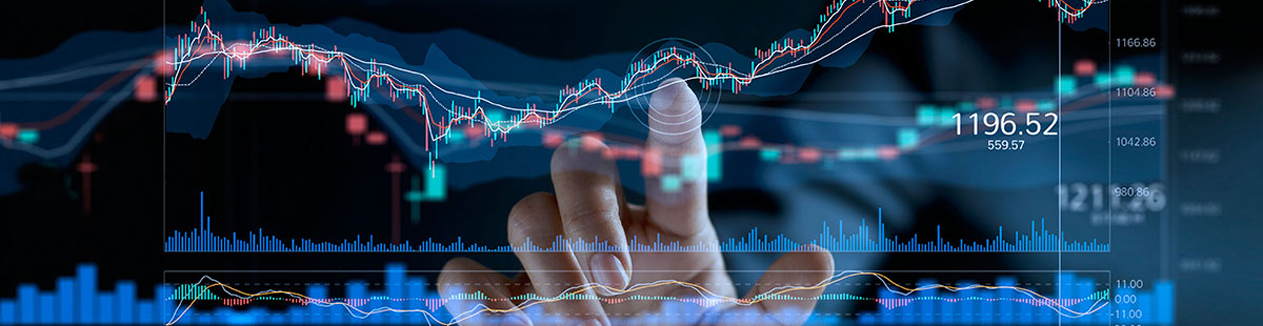

***Autor:***

- Ingeniero Néstor O. Vásquez C.

************************************************************************************************************************************************************************************************************************************************

# ***1. Librerias y Lectura de DataFrame***

In [130]:
########Importamos las librerías y módulos necesario del proyecto.##############
################################################################################

import matplotlib.pyplot as plt
from datetime import datetime
from locale import normalize
from datetime import date
import missingno as msno
import matplotlib.pyplot as plt
import seaborn           as sns
import plotly.express    as px
import warnings
import seaborn
import pandas as pd
import numpy  as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.formula.api as smf
from   scipy import stats
import folium
from folium.plugins import HeatMap
import pandas as pd

# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes


# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y análisis
# ==============================================================================
import statsmodels.api as sm
from scipy import stats
from scipy.stats import pearsonr
import folium
from folium.plugins import HeatMap
import pandas as pd

# Configuración matplotlib
# ==============================================================================
plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
from sklearn.linear_model import LinearRegression                     
## Parte estadística.
import statsmodels.formula.api  as smf                               
from scipy.stats import shapiro, probplot                              
from statsmodels.stats.anova import anova_lm   
import warnings
warnings.filterwarnings('ignore')


sns.set_style("darkgrid")
warnings.filterwarnings("ignore")
plt.style.use("ggplot")

url_base ="https://raw.githubusercontent.com/OswaldVc/BDD/main/Patio_Suba.xlsx"
df = pd.read_excel(url_base)

# ***2. Limpieza de datos***

In [131]:
####Filtro para renombrar la features de acuerdo a tabla de Códigos .###########
################################################################################
df_new = df.rename(columns={"ID":"AAB01","HORA DE INICIO":"AAB02","HORA FINALIZACION":"AAB03","CORREO ELECTRONICO":"AAB04","NOMBRE":"AAB05",
                            "¿ACEPTA PARTICIPAR EN EL ESTUDIO DE INVESTIGACIÓN DE MANERA LIBRE Y VOLUNTARIA?":"AAB06","FECHA EN QUE SE DILIGENCIA LA ENCUESTA":"AAB07",
                            "CARGO":"CARGO","PATIO ASIGNADO":"PATIO","EDAD":"EDAD","SEXO":"GENERO","NIVEL DE ESCOLARIDAD TERMINADO":"NIVEL ACADEMICO","ANTIGUEDAD CONDUCIENDO":"ANTIGUEDAD_CONDUCIENDO",
                            "EXPERIENCIA ANTERIOR":"EXPERIENCIA ANTERIOR", "ESTADO CIVIL":"ESTADO CIVIL","¿CUÁL ES EL ESTRATO QUE REGISTRA EN SU RECIBO PÚBLICO?":"ESTRATO", "NÚMERO DE HIJOS":"HIJOS", 
                            "¿ES USTED PADRE O MADRE CABEZA DE HOGAR?, DEFINIDO COMO LA PERSONA QUE ASUME EN FORMA EXCLUSIVA Y SIN APOYO ALGUNO LA RESPONSABILIDAD DEL HOGAR.":"AAB18", 
                            "¿EN QUÉ ACTIVIDADES DEDICA SU TIEMPO LIBRE?":"AAB19","¿QUE TIPO DE TRABAJO?":"AAB20", "COMUNICACIÓN EN REPORTE DE NOVEDADES (CENTRO CONTROL)":"AAB21",
                            "ATENCIÓN DE CASOS EN VÍA (TÉCNICOS DE SEGURIDAD VIAL)":"AAB22","OPERACIONES (JEFES DE PATIO)":"AAB23","ALISTAMIENTO DE VEHÍCULOS (PERSONAL DE MANTENIMIENTO)":"AAB24",
                            "APOYO A NOVEDADES (AUXILIARES PIR)":"AAB25","OPERACIONES (DEMÁS OPERADORES)":"AAB26",
                            "¿REPORTA A SU JEFE INMEDIATO CUANDO ESTÁ PRESENTANDO PROBLEMAS O MOLESTIAS DE SALUD (FATIGA, ESTRÉS, ANSIEDAD, ENTRE OTROS)?":"AAB27",
                            "¿EN SU LABOR ASUME POSTURAS QUE SOBRE ESFUERZAN LA ESPALDA, BRAZOS, PIERNAS, CUELLO O CABEZA?":"AAB28",
                            "¿TRABAJA EN POSICIÓN ENCOGIDA O INCÓMODA (ENCORVARSE O TRABAJAR EN ESPACIOS PEQUEÑOS)?":"AAB29",
                            "¿REALIZA PAUSAS ACTIVAS DESPUÉS DE REALIZAR UN TRAYECTO QUE IMPLIQUE LARGA DURACIÓN?":"AAB30",
                            "¿LAS HORAS MÍNIMAS QUE DUERME ESTÁN ENTRE 7 – 8 HORAS?":"AAB31","¿EN GENERAL, MANTIENE UNA DIETA BALANCEADA EN SU ALIMENTACIÓN (FRUTAS, VERDURAS, PROTEÍNAS)?":"AAB32",
                            "¿DURANTE SU JORNADA LABORAL, BEBE PEQUEÑOS SORBOS DE AGUA PARA MANTENERSE HIDRATADO?":"AAB33", "¿USA LENTES O GAFAS?":"AAB34","¿REALIZA LOS CONTROLES MÉDICOS?":"AAB35",
                            "¿SUFRE DE ALGUNA ENFERMEDAD?":"AAB36","¿QUÉ TIPO DE ENFERMEDAD PADECE?":"AAB37","¿QUÉ TIPO DE MEDICAMENTOS CONSUME PARA TRATAR LA ENFERMEDAD?":"AAB38",
                            "¿CON QUE FRECUENCIA LOS CONSUME?":"AAB39","¿CONSUME ALCOHOL O NICOTINA?":"AAB40", "ALCOHOL":"AAB41","NICOTINA":"AAB42",
                            "¿ALGUNA VEZ EN SU VIDA HA CONSUMIDO ALGÚN TIPO DE DROGA PSICOACTIVA, ESTAS HACEN REFERENCIA A LAS DROGAS COMO LO SON LA MARIHUANA, LA COCAÍNA, ¿ENTRÉ OTRAS?":"AAB43",
                            "¿CUÁL DE LAS SIGUIENTES DROGAS PSICOACTIVAS SUELE CONSUMIR CON FRECUENCIA, ENTENDIDO FRECUENCIA COMO VARIOS DÍAS A LA SEMANA O DURANTE EL DÍA?":"ABB44",
                            "CONOCE USTED, ¿CUÁLES SON SUS FUNCIONES Y LOS DIFERENTES DESINCENTIVOS RELACIONADOS CON LA OPERACIÓN? (MULTAS POR CONDUCTAS OPERACIONALES, PERIODOS DE RECAPACITACIÓN)":"DESINCENTIVOS_OPERACION",
                            "¿QUÉ TAN SATISFECHO SE ENCUENTRA CON EL PROTOCOLO DE DESINCENTIVOS RELACIONADOS CON LA OPERACIÓN?":"AAB46",
                            "¿CONSIDERA QUE CUENTA CON LAS HERRAMIENTAS NECESARIAS PARA LA EJECUCIÓN DE SU LABOR, EN CUANTO A VEHÍCULOS SEGUROS?":"AAB47",
                            "¿CUÁL ES LA RAZÓN?":"AAB48","¿CONSIDERA QUE CUENTA CON LAS HERRAMIENTAS NECESARIAS PARA LA EJECUCIÓN DE SU LABOR, EN CUANTO A CONOCIMIENTO Y ENTRENAMIENTO?":"AAB49",
                            "¿CUAL ES LA RAZON_2":"AAB50","¿DENTRO DE LA OBSERVACIÓN QUE USTED TIENE EN EL DESARROLLO DE SU LABOR, ORDENE DEL MÁS IMPORTANTE AL MENOS IMPORTANTE LOS ACTORES A LOS QUE LES PRESTA MAYOR ATENCIÓN EN LA VÍA?":"AAB51",
                            "¿DENTRO DE LA OBSERVACIÓN QUE USTED TIENE EN EL DESARROLLO DE SU LABOR, ¿INDIQUE SOLO UN FACTOR DEL MEDIO AMBIENTE AL QUE DEBE PRESTARLE MAYOR ATENCIÓN?":"AAB52",
                            "PARA USTED, ¿CUÁL CONSIDERA QUE ES EL FACTOR MÁS RELEVANTE EN LA PRODUCCIÓN DE UN SINIESTRO?":"AAB53",
                            "¿ANTES DE INICIAR OPERACIÓN REVISA EL ESTADO DE LOS ESPEJOS, LUCES Y LLANTAS DEL VEHÍCULO?":"AAB54",
                            "¿SE COLOCA EL CINTURÓN DE SEGURIDAD ANTES DE INICIAR EL RECORRIDO, AJUSTADO CON LOS TRES PUNTOS DE SEGURIDAD?":"AAB55",
                            "¿REALIZA DE FORMA ADECUADA EL PARQUEO DEL VEHÍCULO PARA EL INGRESO DE LOS PASAJEROS?":"AAB56",
                            "¿MANTIENE UNA VELOCIDAD PROMEDIO EN CONDICIONES NORMALES?":"AAB57","¿PERMITE EL PASO DE PEATONES?":"AAB58",
                            "¿CEDE EL PASO A VEHÍCULOS PARTICULARES O DE TRANSPORTE PÚBLICO?":"AAB59","¿ESTA ATENTO A LOS DIFERENTES ACTORES VIALES?":"AAB60",
                            "¿RESPETA LAS SEÑALES DE TRÁNSITO?":"AAB61", "¿REALIZA EL PARE EN LUGARES SEÑALADOS?":"AAB62","¿SE DETIENE CUANDO EL SEMÁFORO PASA DE AMARILLO A ROJO?":"AAB63",
                            "¿CRUZA CON PRECAUCIÓN EN INTERVENCIONES VIALES?":"AAB64","¿UBICA CORRECTAMENTE EL VEHÍCULO EN EL CARRIL?":"AAB65","¿ENCIENDE LUCES EN APROXIMACIÓN A PARADEROS?":"AAB66",
                            "¿EVITA MANIOBRAS PELIGROSAS?":"AAB67","¿USA LOS ESPEJOS Y REVISA LOS PUNTOS CIEGOS CUANDO CAMBIA DE CARRIL? ":"AAB68",
                            "¿OPERA EL VEHÍCULO SIN DISTRACCIONES (USO DEL TELÉFONO CELULAR, AUDÍFONOS O MANTENER UNA CONVERSACIÓN)?":"AAB69","¿MANTIENE LIBRE LA UNIDAD?":"AAB70",
                            "¿EJECUTA MANIOBRAS COMO RESPUESTA A ESTÍMULOS VIALES?  ":"AAB71","¿OPERA EL VEHÍCULO EN MOVIMIENTO CON LAS PUERTAS CERRADAS?":"AAB72",
                            "¿EVITA FRENADAS BRUSCAS?":"AAB73","¿ANTE NOVEDADES EN LA VÍA,REALIZA REPORTE DESDE LA UNIDAD LÓGICA A CENTRO DE CONTROL?":"AAB74",
                            "¿CONDUCE UN VEHÍCULO SABIENDO PREVIAMENTE QUE PRESENTA UNA FALLA MECÁNICA?":"AAB75","¿SE DEJA CONTROLAR FÁCILMENTE POR LOS DESEOS MÁS QUE POR LA LÓGICA?":"AAB76",
                            "¿SE SIENTE ACTIVO EN SU JORNADA LABORAL?":"AAB77","¿LE GUSTA MANTENER ORDEN EN EL DESARROLLO DE SU LABOR?":"AAB78",
                            "¿ANTE SITUACIONES DE ALTO ESTRÉS SIENTE BLOQUEARSE AL BUSCAR UNA SOLUCIÓN?":"AAB79",
                            "¿SE MOLESTA CON FRECUENCIA ANTE LAS ACCIONES QUE EMPRENDE UN TERCERO?":"AAB80",
                            "¿AL MOMENTO DE EMPRENDER SU LABOR SIGUE SIEMPRE UN PROCESO?":"AAB81","¿LE CUESTA EXPRESAR EMOCIONES CUANDO TIENE UNA SITUACIÓN QUE LO ESTÁ PREOCUPANDO?":"AAB82",
                            "¿SE PREOCUPA CON FACILIDAD ANTE UNA NOVEDAD EN VÍA (ALTO TRÁFICO, ESTADO DE LA VÍA, DEMANDA DE USUARIOS)?":"AAB83",
                            "¿PERCIBE FÁCILMENTE LAS EMOCIONES Y LOS PENSAMIENTOS DE LOS TERCEROS?":"AAB84","¿SE LE DIFICULTA CONTROLAR LOS SENTIMIENTOS NEGATIVOS?":"AAB85",
                            "¿EN UNA SITUACIÓN CONFLICTIVA ENCUENTRA FÁCILMENTE UNA SOLUCIÓN?":"AAB86","¿EN LO CORRIDO DEL AÑO HA PRESENTADO ACCIDENTE DE TRÁNSITO?":"AAB87",
                            "ACCIDENTE SIMPLE":"ACCIDENTE_SIMPLE","ACCIDENTE CON LESIONADO":"ACCIDENTE_CON_LESIONADO","ACCIDENTE CON PERSONA MUERTA":"ACCIDENTE_CON_MUERTO", 
                            "PARA USTED, ¿CUÁL CONSIDERA QUE FUE EL FACTOR PREDOMINANTE EN EL MOMENTO DEL ÚLTIMO ACCIDENTE PRESENTADO?":"AAB91",
                            "EN EL MOMENTO DEL ÚLTIMO EVENTO PRESENTADO, ¿CUÁNTAS HORAS LLEVABA LABORANDO?":"AAB92",
                            "DE LOS SIGUIENTES FACTORES, ¿CUÁL CONSIDERA QUE IMPACTO EN EL EVENTO DEL ACCIDENTE?":"AAB93",
                            "¿CONSIDERA QUE PUDO HABER EJECUTADO ALGUNA ACCIÓN EVASIVA FRENTE AL EVENTO?":"AAB94",
                            "¿QUÉ TIPO DE ACCIÓN CONSIDERA QUE PUEDO HABER REALIZADO?":"AAB95",
                            "¿ANTES DEL EVENTO SE ENCONTRABA REALIZANDO ALGUNA ACTIVIDAD DIFERENTE A LA CONDUCCIÓN?":"AAB96",
                            "¿QUÉ TIPO DE ACCIÓN SE ENCONTRABA REALIZADO?":"AAB97",
                            "EN EL MOMENTO DEL EVENTO, ¿CUÁL FUE SU PRIMERA REACCIÓN? ":"AAB98",
                            "¿CUÁL ES SU NIVEL DE RESPONSABILIDAD FRENTE AL EVENTO?":"AAB99",
                            "¿CONSIDERA QUE ANTE EL EVENTO QUEDO ALGÚN APRENDIZAJE?":"AAB100",
                            "¿CUÁL FUE EL APRENDIZAJE QUE LE QUEDO?":"AAB101",
                            "¿CONSIDERA QUE LA EMPRESA LE HA BRINDADO LAS HERRAMIENTAS NECESARIAS PARA PODER EVITAR ACCIDENTES EN VÍA?":"AAB102",
                            "¿CUÁLES HERRAMIENTAS CONSIDERA QUE LE HACEN FALTA PARA EVITAR LA ACCIDENTALIDAD?":"AAB103",
                            "EL USO DE EQUIPOS ELECTRÓNICOS ES UNA DE LAS INFRACCIONES MÁS RECURRENTES, EN ESPECIAL EL USO DEL TELÉFONO MÓVIL, ¿CUÁL CREE USTED QUE PODRÍA SER UNA SOLUCIÓN A ESTA CONDUCTA?":"AAB104",
                            "OTRA DE LAS CONDUCTAS SON NO CUMPLIR CON LAS PARADAS ESTABLECIDAS EN EL ITINERARIO DE LA OPERACIÓN ¿CUÁL CREE USTED QUE PODRÍA SER UNA SOLUCIÓN A LA OMISIÓN DE LAS PARADAS?":"AAB105",
                            "EL EXCESO DE VELOCIDAD ES OTRO DE LOS FACTORES QUE GENERAN INFRACCIÓN ANTE EL ENTE GESTOR, ¿CUÁL CONSIDERA USTED QUE ES UNA BUENA PRÁCTICA PARA MITIGAR EL EXCESO DE VELOCIDAD?":"AAB105"

                            })
                           
                        

In [ ]:
# ----- Selección de las características que se usarán en el proyecto. --------#

#### Filtro para seleccionar únicamente las Feature que aportan al análisis.####
################################################################################
Columnas = ['AAB07', 'CARGO', 'PATIO', 'EDAD', 'GENERO', 'NIVEL ACADEMICO', 'ANTIGUEDAD_CONDUCIENDO','EXPERIENCIA ANTERIOR','ESTADO CIVIL','ESTRATO','HIJOS',"AAB18","AAB19",
            'AAB21', 'AAB22', 'AAB23', 'AAB24', 'AAB25', 'AAB26', 'AAB27', 'AAB28','AAB29','AAB30','AAB31',"AAB32","AAB33",'AAB34','AAB35','AAB36',"AAB37",
            'AAB40','AAB41',"AAB42","AAB43",'DESINCENTIVOS_OPERACION',"AAB46","AAB47","AAB48","AAB49","AAB50", "AAB51",
            'AAB52','AAB53',"AAB54","AAB55",'AAB56','AAB57',"AAB58","AAB59","AAB60","AAB61", "AAB62",
            'AAB63','AAB64',"AAB65","AAB66",'AAB67','AAB68',"AAB69","AAB70","AAB71","AAB72", "AAB73",
            'AAB74','AAB75',"AAB76","AAB77",'AAB78','AAB79',"AAB80","AAB81","AAB82","AAB83", "AAB84",
            'AAB85','AAB86',"AAB87","ACCIDENTE_SIMPLE",'ACCIDENTE_CON_LESIONADO','ACCIDENTE_CON_MUERTO',"AAB91","AAB92","AAB93","AAB94", "AAB95",
            'AAB96','AAB97',"AAB98","AAB99",'AAB100','AAB101',"AAB102","AAB103","AAB104","AAB105"
            ]

df_inf = df_new[Columnas]

In [ ]:
#### Filtro para categorizar el contenido de Feature AAB51 .####################
################################################################################
df_inf.loc[df_inf['AAB51']=='Bicitaxistas,Ciclistas,Motociclistas,Peatones,Usuarios,Carrosparticulares,Camiones ,Furgones ,Buses,Taxis', 'AAB51']=0
df_inf.loc[df_inf['AAB51']=='Bicitaxistas,Ciclistas,Peatones,Carrosparticulares,Camiones ,Furgones ,Motociclistas,Usuarios,Buses,Taxis', 'AAB51']=1
df_inf.loc[df_inf['AAB51']=='Peatones,Usuarios,Ciclistas,Motociclistas,Bicitaxistas,Carrosparticulares,Camiones ,Furgones ,Buses,Taxis', 'AAB51']=2
df_inf.loc[df_inf['AAB51']=='Ciclistas,Peatones,Motociclistas,Bicitaxistas,Usuarios,Carrosparticulares,Camiones ,Furgones ,Buses,Taxis', 'AAB51']=3
df_inf.loc[df_inf['AAB51']=='Usuarios,Ciclistas,Bicitaxistas,Peatones,Motociclistas,Buses,Taxis,Carrosparticulares,Camiones ,Furgones', 'AAB51']=4
df_inf.loc[df_inf['AAB51']=='Usuarios,Peatones,Ciclistas,Motociclistas,Bicitaxistas,Camiones,Furgones,Buses,Taxis,Carrosparticulares', 'AAB51']=5
df_inf.loc[df_inf['AAB51']=='Ciclistas,Motociclistas,Bicitaxistas,Carrosparticulares,Buses,Taxis,Camiones ,Furgones ,Usuarios,Peatones', 'AAB51']=6
df_inf.loc[df_inf['AAB51']=='Motociclistas,Bicitaxistas,Ciclistas,Peatones,Carrosparticulares,Buses,Taxis,Camiones ,Furgones ,Usuarios', 'AAB51']=7
df_inf.loc[df_inf['AAB51']=='Ciclistas,Carrosparticulares,Peatones,Camiones ,Furgones ,Motociclistas,Buses,Taxis,Usuarios,Bicitaxistas', 'AAB51']=8
df_inf.loc[df_inf['AAB51']=='Peatones,Ciclistas,Usuarios,Motociclistas,Bicitaxistas,Buses,Taxis,Carrosparticulares,Camiones ,Furgones', 'AAB51']=9
df_inf.loc[df_inf['AAB51']=='Ciclistas,Usuarios,Peatones,Carrosparticulares,Motociclistas,Bicitaxistas,Camiones ,Furgones ,Buses,Taxis', 'AAB51']=10
df_inf.loc[df_inf['AAB51']=='Peatones,Usuarios,Ciclistas,Motociclistas,Bicitaxistas,Carrosparticulares,Buses,Taxis,Camiones ,Furgones', 'AAB51']=11
df_inf.loc[df_inf['AAB51']=='Peatones,Ciclistas,Usuarios,Motociclistas,Carrosparticulares,Bicitaxistas,Camiones ,Furgones ,Buses,Taxis', 'AAB51']=12
df_inf.loc[df_inf['AAB51']=='Camiones,Furgones,Bicitaxistas,Usuarios,Ciclistas,Carrosparticulares,Peatones,Motociclistas,Buses,Taxis', 'AAB51']=13
df_inf.loc[df_inf['AAB51']=='Motociclistas,Bicitaxistas,Peatones,Usuarios,Ciclistas,Carrosparticulares,Camiones ,Furgones ,Buses,Taxis', 'AAB51']=14
df_inf.loc[df_inf['AAB51']=='Usuarios,Peatones,Ciclistas,Bicitaxistas,Motociclistas,Carrosparticulares,Buses,Taxis,Camiones ,Furgones', 'AAB51']=15
df_inf.loc[df_inf['AAB51']=='Usuarios,Peatones,Bicitaxistas,Ciclistas,Carrosparticulares,Camiones ,Furgones ,Buses,Taxis,Motociclistas', 'AAB51']=16
df_inf.loc[df_inf['AAB51']=='Peatones,Usuarios,Ciclistas,Bicitaxistas,Motociclistas,Carrosparticulares,Buses,Taxis,Camiones ,Furgones', 'AAB51']=17
df_inf.loc[df_inf['AAB51']=='Usuarios,Ciclistas,Peatones,Bicitaxistas,Motociclistas,Carrosparticulares,Buses,Taxis,Camiones ,Furgones', 'AAB51']=18
df_inf.loc[df_inf['AAB51']=='Usuarios,Bicitaxistas,Ciclistas,Peatones,Motociclistas,Carrosparticulares,Camiones ,Furgones ,Buses,Taxis', 'AAB51']=19
df_inf.loc[df_inf['AAB51']=='Peatones,Usuarios,Bicitaxistas,Ciclistas,Motociclistas,Buses,Taxis,Carrosparticulares,Camiones ,Furgones', 'AAB51']=20
df_inf.loc[df_inf['AAB51']=='Peatones,Usuarios,Ciclistas,Motociclistas,Carrosparticulares,Buses,Taxis,Camiones ,Furgones ,Bicitaxistas', 'AAB51']=21
df_inf.loc[df_inf['AAB51']=='Ciclistas,Bicitaxistas,Peatones,Motociclistas,Carrosparticulares,Camiones ,Furgones ,Usuarios,Buses,Taxis', 'AAB51']=22
df_inf.loc[df_inf['AAB51']=='Carrosparticulares,Buses,Taxis,Camiones,Furgones,Ciclistas,Peatones,Usuarios,Motociclistas,Bicitaxistas', 'AAB51']=23


#### Filtro para categorizar el contenido de Feature AAB52 .####################
################################################################################

df_inf.loc[df_inf['AAB52']=='Estado de la malla vial (existencia de peralte, puentes, alcantarillas, pendientes y abovedamiento de la vía)', 'AAB52']=100
df_inf.loc[df_inf['AAB52']=='Las condiciones meteorológicas (presencia de lluvia, niebla, humo, exposición a la luz y luminosidad)', 'AAB52']=200
df_inf.loc[df_inf['AAB52']=='Todas las anteriores', 'AAB52']=300


#### Filtro para categorizar el contenido de Feature AAB53 .####################
################################################################################
df_inf.loc[df_inf['AAB53']=='Factor Humano, hace referencia a la toma de decisión en la ejecución de maniobras sobre el vehículo', 'AAB53']=10
df_inf.loc[df_inf['AAB53']=='Factor Ambiental, hace referencia a las condiciones de la vía y condiciones meteorológicas', 'AAB53']=20
df_inf.loc[df_inf['AAB53']=='Factor Mecánico, hace referencia a las condiciones que tiene el vehículo', 'AAB53']=30



#### Filtro para categorizar el contenido de Feature ANTIGUEDAD_CONDUCIENDO.####
################################################################################
df_inf.loc[df_inf['ANTIGUEDAD_CONDUCIENDO']=='>  10 años', 'ANTIGUEDAD_CONDUCIENDO']=11
df_inf.loc[df_inf['ANTIGUEDAD_CONDUCIENDO']=='0 - 1 año', 'ANTIGUEDAD_CONDUCIENDO']=1
df_inf.loc[df_inf['ANTIGUEDAD_CONDUCIENDO']=='1 - 3 años', 'ANTIGUEDAD_CONDUCIENDO']=2
df_inf.loc[df_inf['ANTIGUEDAD_CONDUCIENDO']=='3 - 5 años', 'ANTIGUEDAD_CONDUCIENDO']=4
df_inf.loc[df_inf['ANTIGUEDAD_CONDUCIENDO']=='5 - 7 años', 'ANTIGUEDAD_CONDUCIENDO']=6
df_inf.loc[df_inf['ANTIGUEDAD_CONDUCIENDO']=='7 - 10 años', 'ANTIGUEDAD_CONDUCIENDO']=8



#### Filtro para categorizar el contenido de Feature AAB48 .####################
################################################################################
df_inf.loc[df_inf['AAB48']=='Carros en mal estado poco mantenimiento seguro sobrecarga laboral', 'AAB48']="Falta de mantenimiento"
df_inf.loc[df_inf['AAB48']=='El mal estado de los vehículos ', 'AAB48']="Falta de mantenimiento"
df_inf.loc[df_inf['AAB48']=='Fallas en el mantenimiento ', 'AAB48']="Falta de mantenimiento"
df_inf.loc[df_inf['AAB48']=='Falta de mantenimiento ', 'AAB48']="Falta de mantenimiento"
df_inf.loc[df_inf['AAB48']=='falta de información ', 'AAB48']="Falta de mantenimiento"
df_inf.loc[df_inf['AAB48']=='Falta de mantenimiento a los vehículos y mala infraestructura vial', 'AAB48']="Falta de mantenimiento"
df_inf.loc[df_inf['AAB48']=='Hay vehículos q no están adecuados para una ruta de pendiente', 'AAB48']="Falta de mantenimiento"
df_inf.loc[df_inf['AAB48']=='Largos de frenos', 'AAB48']="Falta de mantenimiento"
df_inf.loc[df_inf['AAB48']=='Mal estado como frenos,espejos,silla del operador ect.', 'AAB48']="Falta de mantenimiento"
df_inf.loc[df_inf['AAB48']=='Mal mantenimiento ', 'AAB48']="Falta de mantenimiento"
df_inf.loc[df_inf['AAB48']=='Mantenimiento ', 'AAB48']="Falta de mantenimiento"
df_inf.loc[df_inf['AAB48']=='Mantenimiento mecanico', 'AAB48']="Falta de mantenimiento"
df_inf.loc[df_inf['AAB48']=='Padrones en muy mal estado', 'AAB48']="Falta de mantenimiento"
df_inf.loc[df_inf['AAB48']=='Pésimo mantenimiento herramientas que no sonson aptas para la operacion', 'AAB48']="Falta de mantenimiento"
df_inf.loc[df_inf['AAB48']=='Por qué uno les informa Alós de mantenimiento que los móviles están fallando por algo y la respuesta de ellos es dejelo hay que a hora lo revisamos y a los dos días vuelve a cojer el mismo movil y presenta las mismas fallas', 'AAB48']="Falta de mantenimiento"
df_inf.loc[df_inf['AAB48']=='Vehículos en mal estado casi siempre', 'AAB48']="Falta de mantenimiento"
df_inf.loc[df_inf['AAB48']=='Vehículos en mal estado como largos de frenos ...muy poco aseo ,poca potencia etc', 'AAB48']="Falta de mantenimiento"
df_inf.loc[df_inf['AAB48']=='Vehículos sin mantenimiento ', 'AAB48']="Falta de mantenimiento"
df_inf.loc[df_inf['AAB48']=='falta de mantenimiento ', 'AAB48']="Falta de mantenimiento"
df_inf.loc[df_inf['AAB48']=='El mantenimiento de los vehículos no es propiamente el. Optimo', 'AAB48']="Falta de mantenimiento"
df_inf.loc[df_inf['AAB48']=='Hay en el tablero de instrumentos fallas erradas u omitidas. Hay sillas que el espaldar es hundido como y uno queda como metido en muchila. Hay sillas que no corren lo suficiente para personas de talla mediana. Hay cinturones que son muy cortos. La mayoría de embragues son duros. Hay chancletas de aceleración en padrón que están torcidas. Hay padrones que votan por el volante calor a la cara y seca las pupilas. La vibración del motor se transmite a los espejos y hay civilidad borrosa. Otras etc.', 'AAB48']="Falta de mantenimiento"
df_inf.loc[df_inf['AAB48']=='Falta de mantenimiento ', 'AAB48']="Falta de mantenimiento"
df_inf.loc[df_inf['AAB48']=='Vehículos en mal estado ', 'AAB48']="Falta de mantenimiento"
df_inf.loc[df_inf['AAB48']=='Dirección y suspensión ', 'AAB48']="Falta de mantenimiento"
df_inf.loc[df_inf['AAB48']=='Por la improvisación en el área de mantenimiento y y tener  reiterativo en la falla de los zonales', 'AAB48']="Falta de mantenimiento"
df_inf.loc[df_inf['AAB48']=='Vehiculo viejos', 'AAB48']="Falta de mantenimiento"
df_inf.loc[df_inf['AAB48']=='De vez en cuando hay móviles que uno prefiere no operar por su estado.', 'AAB48']="Falta de mantenimiento"
df_inf.loc[df_inf['AAB48']=='Poco mantenimiento ', 'AAB48']="Falta de mantenimiento"
df_inf.loc[df_inf['AAB48']=='vehículos en desaseo ', 'AAB48']="Falta de mantenimiento"
df_inf.loc[df_inf['AAB48']=='Móviles viejos y algunos en mal estado', 'AAB48']="Falta de mantenimiento"


df_inf.loc[df_inf['AAB47']=='Herramientas en mal estado ', 'AAB47']="Falta de capacitación"
df_inf.loc[df_inf['AAB47']=='Falta de capacitacion', 'AAB47']="Falta de capacitación"
df_inf.loc[df_inf['AAB47']=='Móviles y patios en pésimo estado supervisores abusivos', 'AAB47']="Maltrato del superior"


#### Filtro para categorizar el contenido de Feature AAB50 .####################
################################################################################
df_inf.loc[df_inf['AAB50']=='Falta de mantenimiento', 'AAB50']="Falta de capacitación"
df_inf.loc[df_inf['AAB50']=='Falta de mantenimiento', 'AAB50']="Falta de capacitación"
df_inf.loc[df_inf['AAB50']=='Herramientas en mal estado ', 'AAB50']="Falta de capacitación"
df_inf.loc[df_inf['AAB50']=='Falta de capacitacion', 'AAB50']="Falta de capacitación"
df_inf.loc[df_inf['AAB50']=='Móviles y patios en pésimo estado supervisores abusivos', 'AAB50']="Maltrato del superior"


#### Filtro para categorizar el contenido de EXPERIENCIA ANTERIOR .####################
df_inf.loc[df_inf['EXPERIENCIA ANTERIOR']=='Experiencia Formal en Transporte (Transporte de Carga, mercancías u otras)', 'EXPERIENCIA ANTERIOR']= 99
df_inf.loc[df_inf['EXPERIENCIA ANTERIOR']=='Experiencia en Transporte Público (bus interurbano, Transporte escolar, Taxi, Uber, Cafiby y Movilmove)', 'EXPERIENCIA ANTERIOR']= 100
df_inf.loc[df_inf['EXPERIENCIA ANTERIOR']=='Experiencia en el sistema integrado de transporte público (SITP)', 'EXPERIENCIA ANTERIOR']= 101
df_inf.loc[df_inf['EXPERIENCIA ANTERIOR']=='Trasmilenio', 'EXPERIENCIA ANTERIOR']= 102
df_inf.loc[df_inf['EXPERIENCIA ANTERIOR']=='Ventas', 'EXPERIENCIA ANTERIOR']= 103
df_inf.loc[df_inf['EXPERIENCIA ANTERIOR']=='Artes gráficas como conductor ', 'EXPERIENCIA ANTERIOR']= 104
df_inf.loc[df_inf['EXPERIENCIA ANTERIOR']=='Experiencia en Transporte Público (bus interurbano, Transporte Corriente, Transporte escolar, Taxi, Uber, Cafiby y Movilmove)', 'EXPERIENCIA ANTERIOR']= 105
df_inf.loc[df_inf['EXPERIENCIA ANTERIOR']=='Particular ', 'EXPERIENCIA ANTERIOR']= 106
df_inf.loc[df_inf['EXPERIENCIA ANTERIOR']=='Trabaje en una multinacional', 'EXPERIENCIA ANTERIOR']= 107
df_inf.loc[df_inf['EXPERIENCIA ANTERIOR']=='Volquetas y taxi', 'EXPERIENCIA ANTERIOR']= 108


#### Filtro para categorizar el contenido de ESTADO CIVIL .####################
df_inf.loc[df_inf['ESTADO CIVIL']=='Casado', 'ESTADO CIVIL']='Casado'
df_inf.loc[df_inf['ESTADO CIVIL']=='Casado ', 'ESTADO CIVIL']='Casado'
df_inf.loc[df_inf['ESTADO CIVIL']=='Separado-Divorciado', 'ESTADO CIVIL']='Separado-Divorciado'
df_inf.loc[df_inf['ESTADO CIVIL']=='Soltero', 'ESTADO CIVIL']='Soltero'
df_inf.loc[df_inf['ESTADO CIVIL']=='Uniónlibre', 'ESTADO CIVIL']='Uniónlibre'


df_inf.loc[df_inf['HIJOS']=='>4', 'HIJOS']=5
df_inf['ANTIGUEDAD_CONDUCIENDO'] = pd.to_numeric(df_inf['ANTIGUEDAD_CONDUCIENDO'])
df_inf['HIJOS'] = pd.to_numeric(df_inf['HIJOS'])

************************************************************************************************************************************************************************************************************************************************

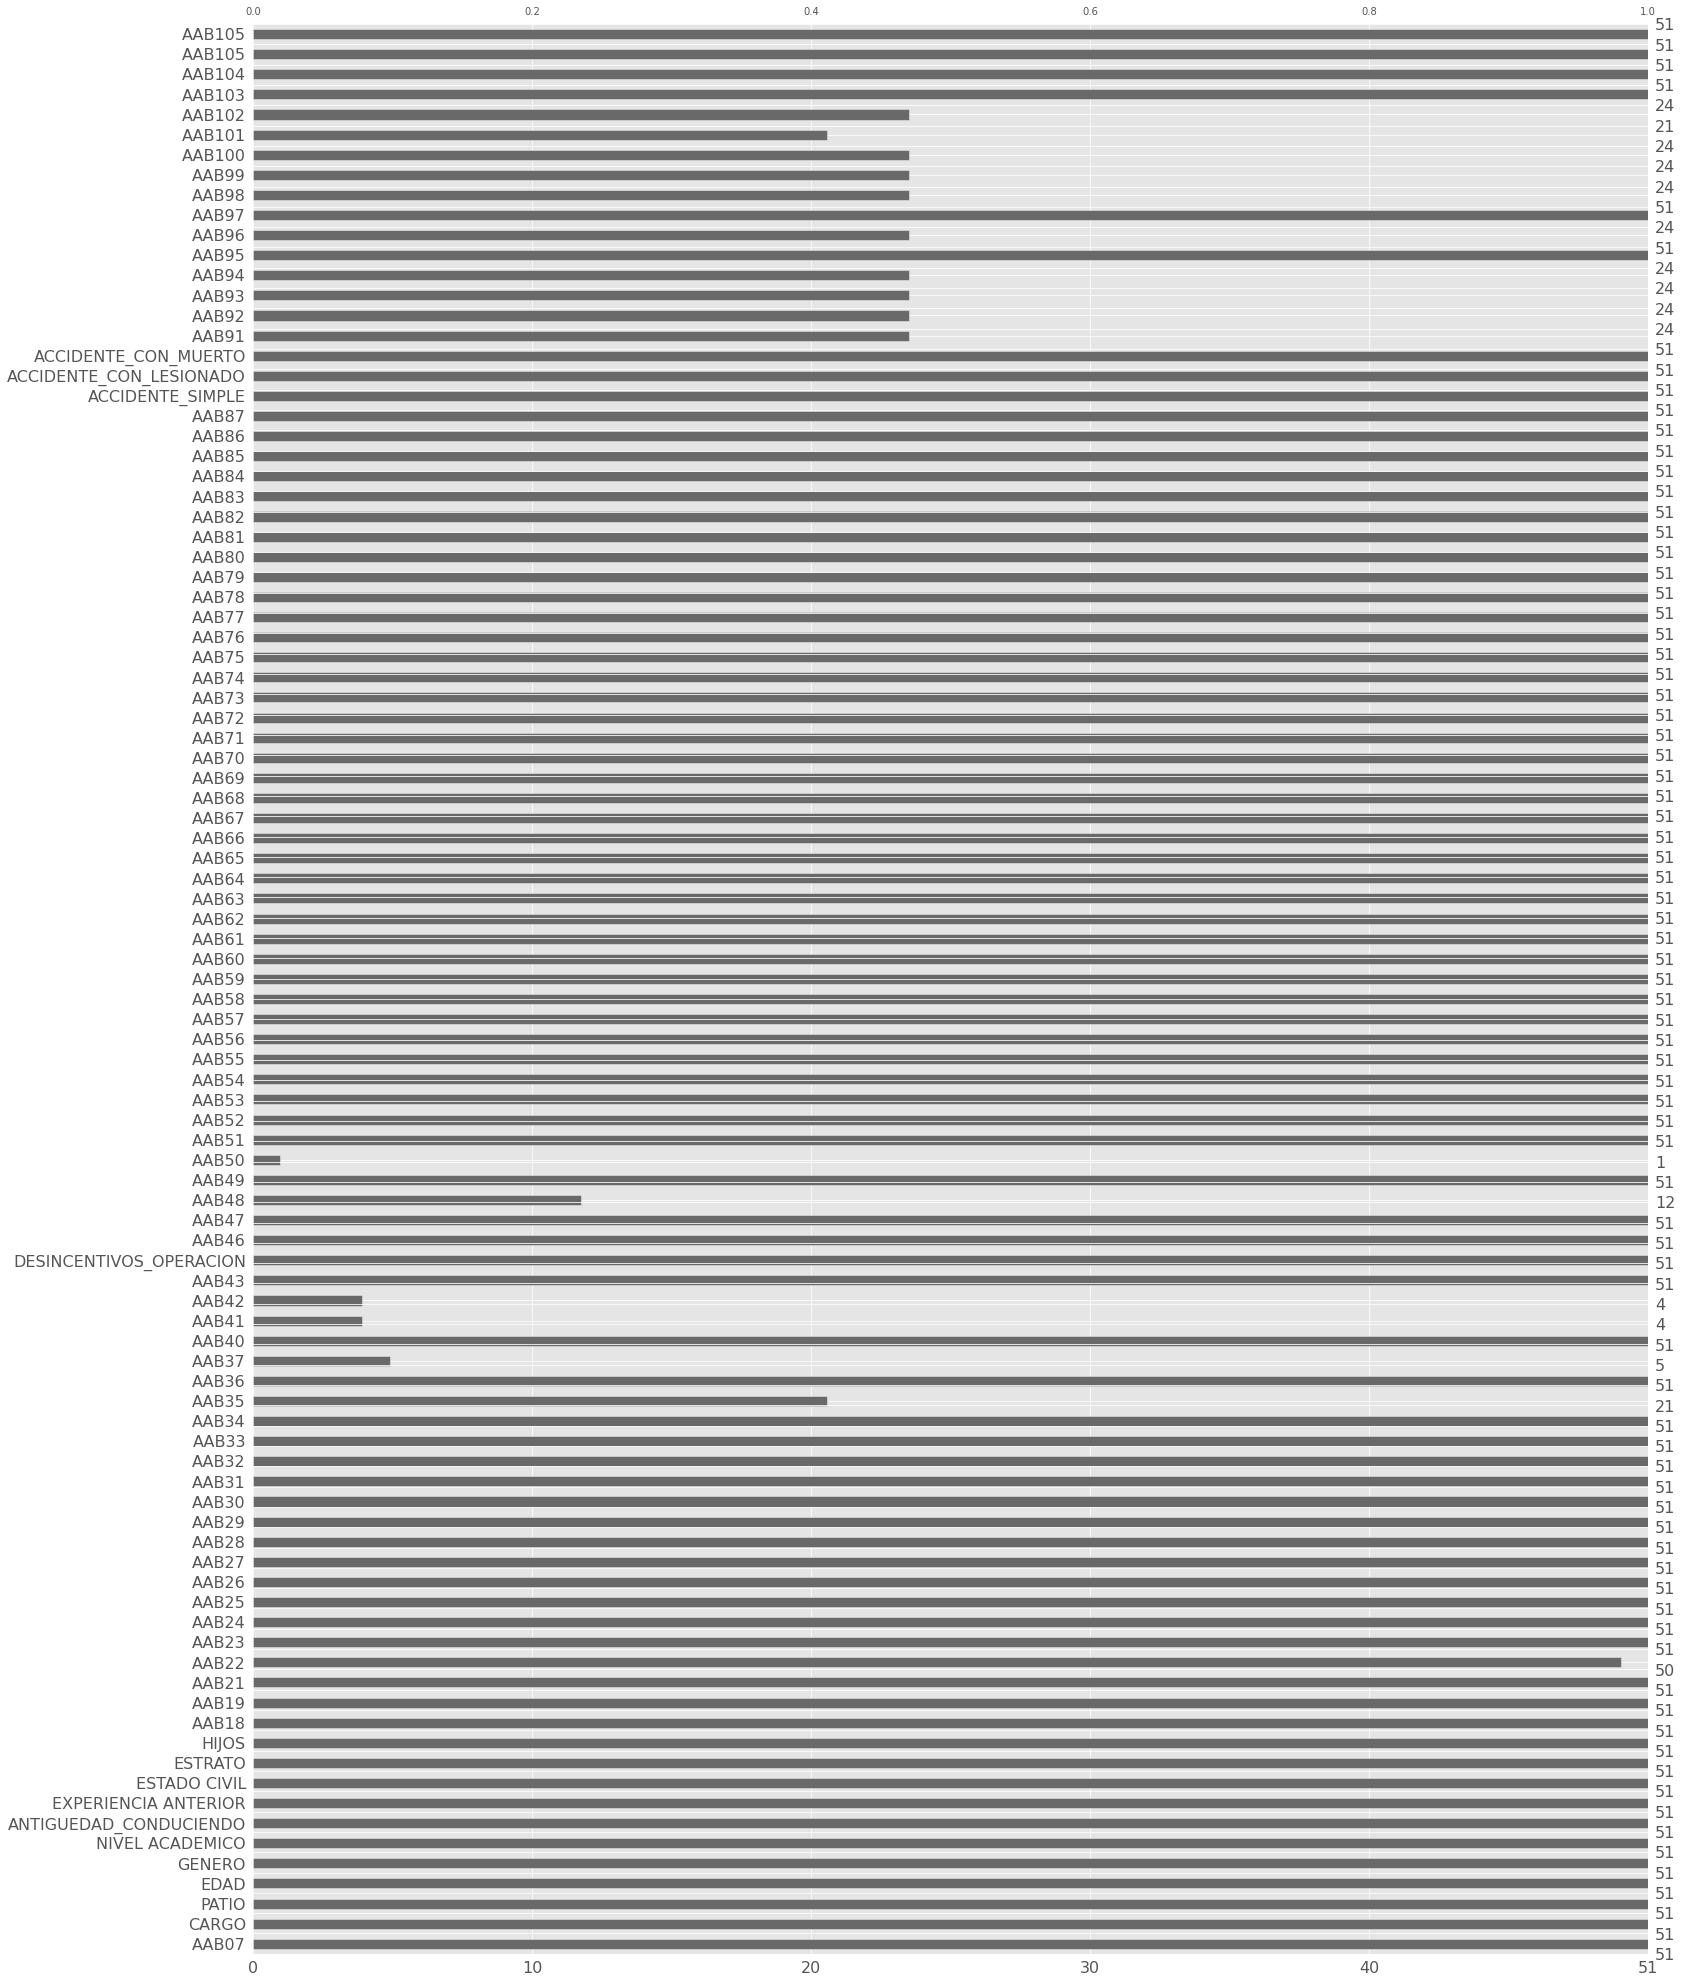

In [ ]:
msno.bar(df_inf);

************************************************************************************************************************************************************************************************************************************************

************************************************************************************************************************************************************************************************************************************************

#***3. Análisis descriptivo de la población encuestada - Patio Suba Salitre, Masivo Capital***

***Georreferenciación:***

In [132]:
m = folium.Map( 
    location=[4.7582278, -74.0809126], 
    zoom_start=50, 
    tiles='Stamen Terrain' 
) 
tooltip = 'Patio Suba Salitre'
folium.Marker([4.7582278, -74.0809126], popup='Patio Suba Salitre', tooltip=tooltip).add_to(m) 
m

****************************************************************************************************************************************************************

***Tamaño de la Muestra:***

In [133]:
df_inf.shape

(51, 96)

- La data dispone de 96 columnas, estas representan el contenido descriptivo de las de las 51 variales registradas y filtradas.

****************************************************************************************************************************************************************

***Clasificación de Género:***

In [134]:
df_inf["GENERO"].value_counts()

Masculino    45
Femenino      6
Name: GENERO, dtype: int64

- En la encuesta participan 45 hombres y seis mujeres.

****************************************************************************************************************************************************************

***Operadores encuestados:***

In [135]:
df_inf["PATIO"].value_counts()

Suba Salitre    51
Name: PATIO, dtype: int64

- El total de ecuestados son 51 operadores.

# ***3.1. Gráficos distribución edades de la población Patio Suba Salitre, Masivo Capital:***

************************************************************************************************************************************************************************************************************************************************

In [ ]:

frec_abs_EDAD = df_inf["EDAD"].value_counts()
frec_abs_EDAD.rename("frec_abs_EDAD", inplace = True)
Frecuencia_relativa_EDAD = df_inf["EDAD"].value_counts(normalize = True)
Frecuencia_relativa_EDAD.rename("Frecuencia_relativa_EDAD", inplace = True)
Frecuencia_relativa_porcentual_EDAD= df_inf["EDAD"].value_counts(normalize = True)*100
Frecuencia_relativa_porcentual_EDAD.rename("frec_rela_%", inplace = True)

tabla_frecuencia = pd.concat([frec_abs_EDAD,Frecuencia_relativa_EDAD,Frecuencia_relativa_porcentual_EDAD],axis=1)
total = pd.DataFrame(tabla_frecuencia.apply(sum,axis=0), columns=["TOTALES"]).T
pd.concat([tabla_frecuencia,total],axis = 0)


,frec_abs_EDAD,Frecuencia_relativa_EDAD,frec_rela_%
41-45,11.0,0.215686,21.568627
56-60,10.0,0.196078,19.607843
51-55,8.0,0.156863,15.686275
26-30,6.0,0.117647,11.764706
31-35,5.0,0.098039,9.803922
>61,5.0,0.098039,9.803922
36-40,3.0,0.058824,5.882353
18-25,3.0,0.058824,5.882353
TOTALES,51.0,1.000000,100.000000


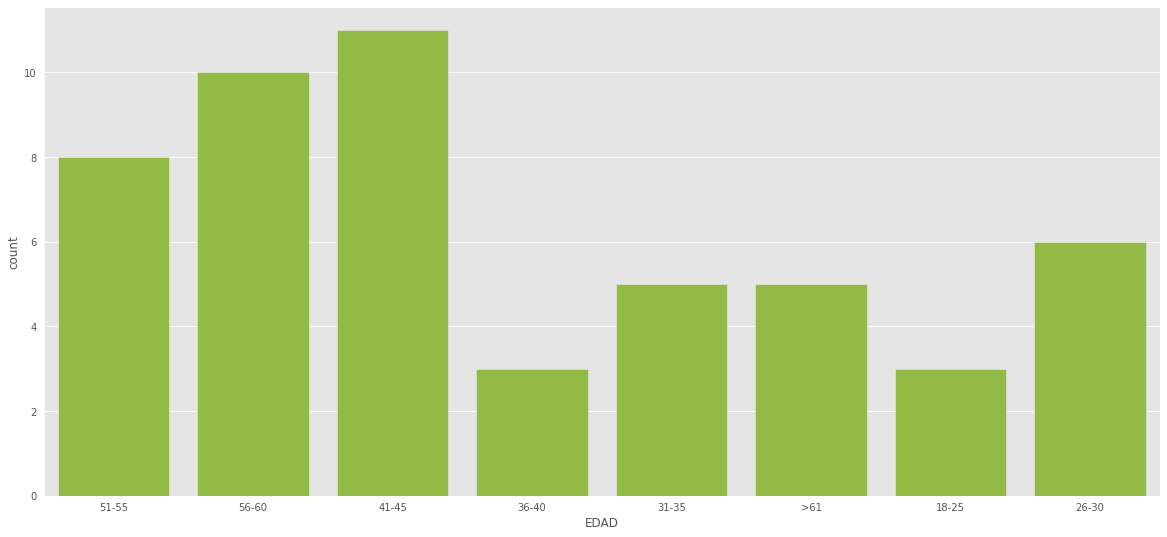

In [ ]:
plt.figure(figsize = (20,9))
sns.countplot(data = df_inf, x = "EDAD", color = "yellowgreen")
plt.show()

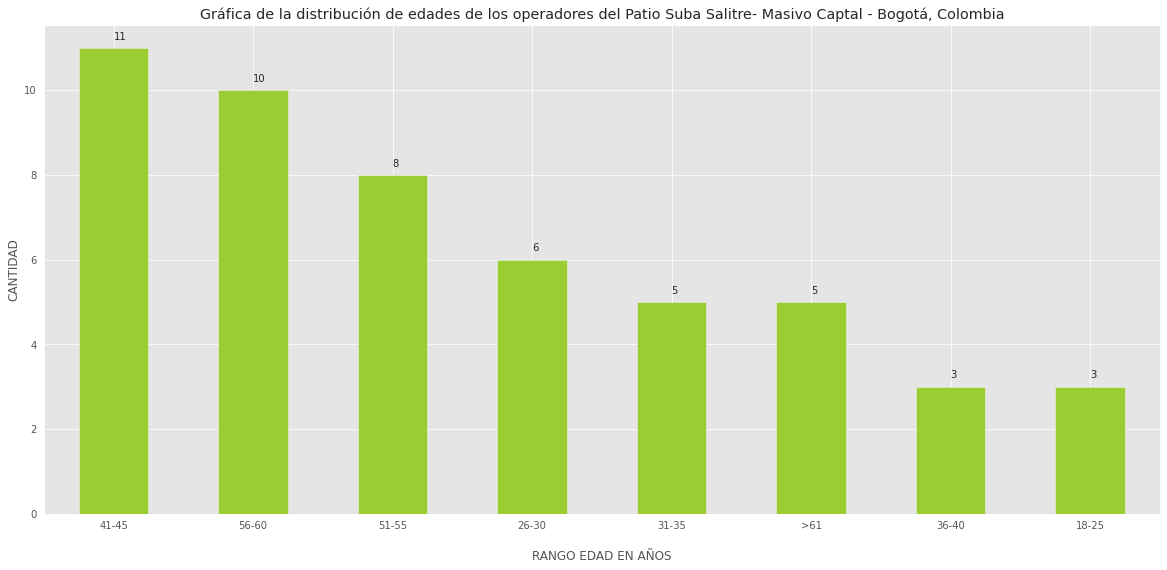

In [ ]:
plt.style.use("ggplot")   
plt.figure(figsize = (20,9))
plt.title("Gráfica de la distribución de edades de los operadores del Patio Suba Salitre- Masivo Captal - Bogotá, Colombia",) 
plt.xlabel("\nRANGO EDAD EN AÑOS")     
plt.ylabel("CANTIDAD") 
tabla_frecuencia["frec_abs_EDAD"].plot(kind="bar",color = "yellowgreen")

#ax = plt.axes()        
#ax.yaxis.grid()
#ax.xaxis.grid()

for label, annot in enumerate(tabla_frecuencia['frec_abs_EDAD']):  
  plt.annotate(str(annot),xy=(label,annot + 0.2))
#ax.set_facecolor('w')
plt.xticks(rotation = 0)
plt.show()

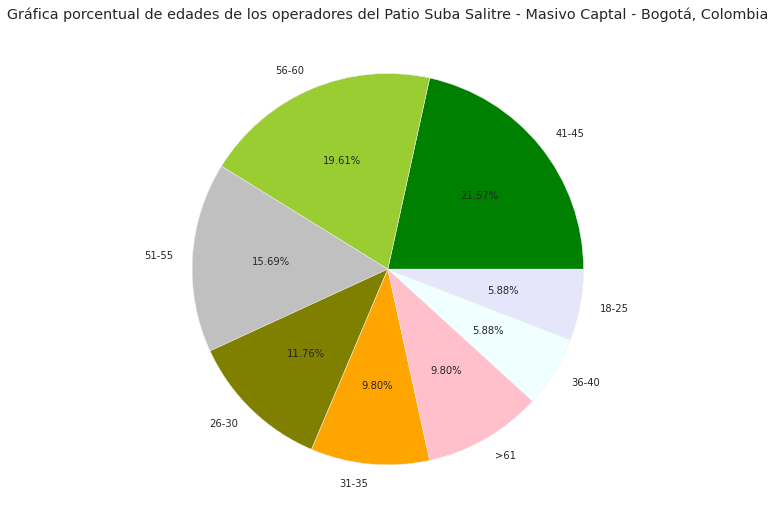

In [ ]:
## pie plot
plt.figure(figsize = (20,9))
plt.pie(tabla_frecuencia['frec_abs_EDAD'],labels = tabla_frecuencia.index,
        colors = ["Green", "Yellowgreen", "Silver", "Olive", "orange", "pink", "Azure","Lavender","Gold",], autopct='%.2f%%')
plt.title("Gráfica porcentual de edades de los operadores del Patio Suba Salitre - Masivo Captal - Bogotá, Colombia",)
plt.show()

# ***Obsercaciones***

- ***El rango de edad con mayor presencia en el estudio son edades dentro de 41 a 45 años, con un 21.57%***

- ***El rango de edad con menor presencia es de 18 a 25 años con un 5.88% y el de 36 a 40 -  5.88% ***



************************************************************************************************************************************************************************************************************************************************

# ***3.2. Gráficos distribución por género Patio Suba Salitre, Masivo Capital:***

In [ ]:

frec_abs = df_inf["GENERO"].value_counts()
frec_abs.rename("frec_abs", inplace = True)

Masculino    45
Femenino      6
Name: frec_abs, dtype: int64

In [ ]:
## Frecuencia relativa.
frec_rela = df_inf["GENERO"].value_counts(normalize = True)
frec_rela.rename("frec_rela", inplace = True)

Masculino    0.882353
Femenino     0.117647
Name: frec_rela, dtype: float64

In [ ]:
## Frecuencia Porcentual.
frec_rela_porcen = df_inf["GENERO"].value_counts(normalize = True)*100
frec_rela_porcen.rename("frec_rela_porcen", inplace = True)

Masculino    88.235294
Femenino     11.764706
Name: frec_rela_porcen, dtype: float64

In [ ]:
tabla_frecuencia = pd.concat([frec_abs,frec_rela,frec_rela_porcen],axis=1)
total = pd.DataFrame(tabla_frecuencia.apply(sum,axis=0), columns=["TOTALES"]).T
pd.concat([tabla_frecuencia,total],axis = 0)

,frec_abs,frec_rela,frec_rela_porcen
Masculino,45.0,0.882353,88.235294
Femenino,6.0,0.117647,11.764706
TOTALES,51.0,1.000000,100.000000


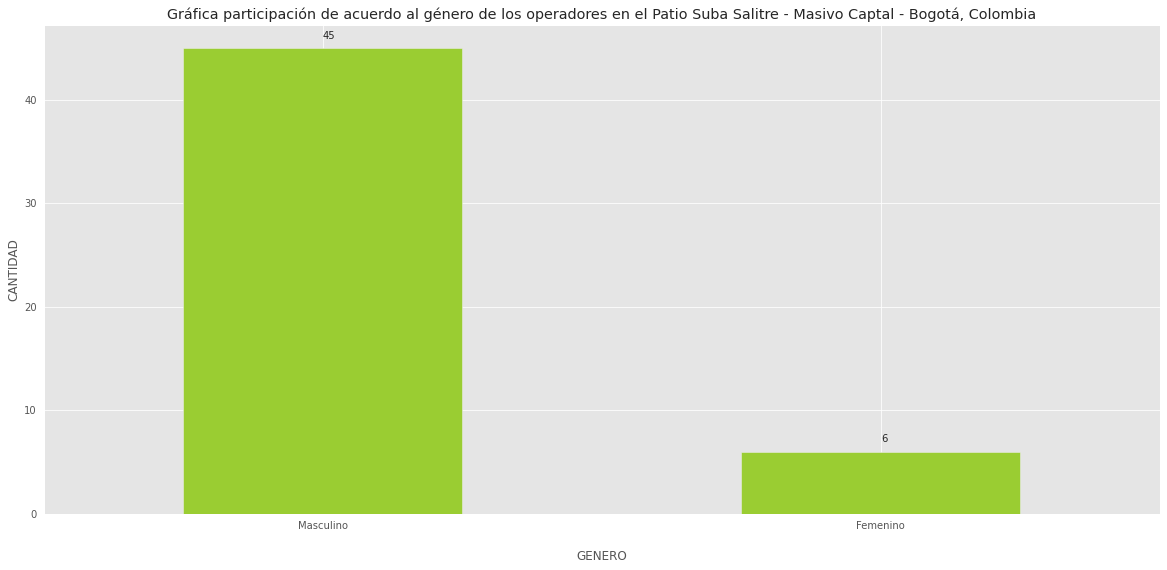

In [ ]:
plt.style.use("ggplot") 
plt.figure(figsize = (20,9))
plt.title("Gráfica participación de acuerdo al género de los operadores en el Patio Suba Salitre - Masivo Captal - Bogotá, Colombia",)
plt.xlabel("\nGENERO") 
plt.ylabel("CANTIDAD") 
tabla_frecuencia["frec_abs"].plot(kind="bar",color = "yellowgreen")

for label, annot in enumerate(tabla_frecuencia['frec_abs']):  
  plt.annotate(str(annot),xy=(label,annot + 0.9))

plt.xticks(rotation = 0)
plt.show()

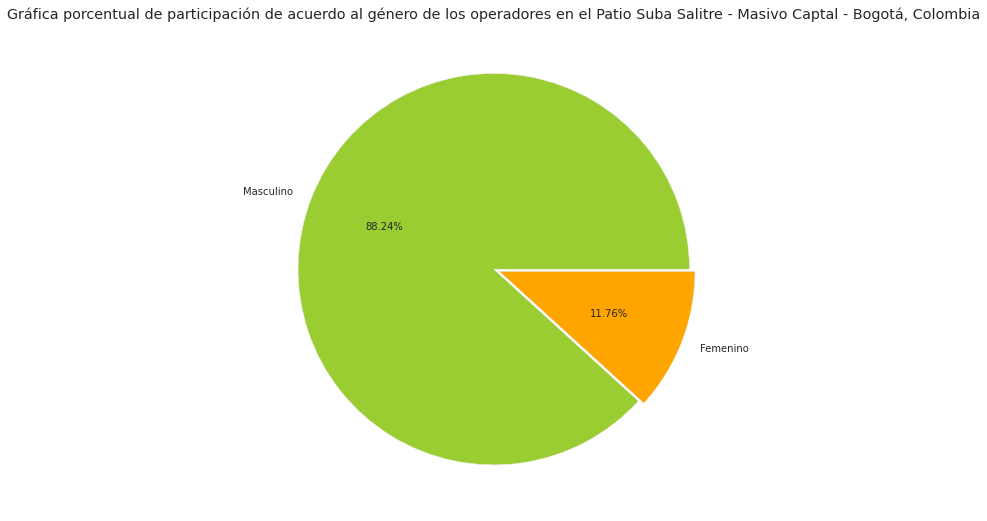

In [ ]:
plt.figure(figsize = (20,9))
explode = [0, 0.03]
plt.pie(tabla_frecuencia['frec_abs'],labels = tabla_frecuencia.index,
        colors = ["yellowgreen", "orange"], autopct='%.2f%%',explode = explode)
plt.title("Gráfica porcentual de participación de acuerdo al género de los operadores en el Patio Suba Salitre - Masivo Captal - Bogotá, Colombia",)
plt.show()

# ***Observaciones:***

- ***Se observa la presencia de 45 hombres y seis mujeres en este conjunto de datos, para un total de 51 encuestados. el genero masculino aporto el 88.24% y el femenino el 11.76%, es claro que el sesgo es desproporcionado por el género másculino y la escasez del género femenino. Los porcentajes se ajustan de acuerdo a la aproximación decimal que hace el software científico.***







************************************************************************************************************************************************************************************************************************************************

# ***3.2. Gráficos distribución estrato social  Patio Suba Salitre, Masivo Capital:***

In [ ]:
frec_abs_AAB16 = df_inf["ESTRATO"].value_counts()
frec_abs_AAB16.rename("frec_abs_AAB16", inplace = True)
Frecuencia_relativa_AAB16 = df_inf["ESTRATO"].value_counts(normalize = True)
Frecuencia_relativa_AAB16.rename("Frecuencia_relativa_AAB16", inplace = True)
Frecuencia_relativa_porcentual_AAB16= df_inf["ESTRATO"].value_counts(normalize = True)*100
Frecuencia_relativa_porcentual_AAB16.rename("frec_rela_%", inplace = True)

tabla_frecuencia_AAB16 = pd.concat([frec_abs_AAB16,Frecuencia_relativa_AAB16,Frecuencia_relativa_porcentual_AAB16],axis=1)
total = pd.DataFrame(tabla_frecuencia_AAB16.apply(sum,axis=0), columns=["TOTALES"]).T
pd.concat([tabla_frecuencia_AAB16,total],axis = 0)

,frec_abs_AAB16,Frecuencia_relativa_AAB16,frec_rela_%
3,23.0,0.450980,45.098039
2,23.0,0.450980,45.098039
1,5.0,0.098039,9.803922
TOTALES,51.0,1.000000,100.000000


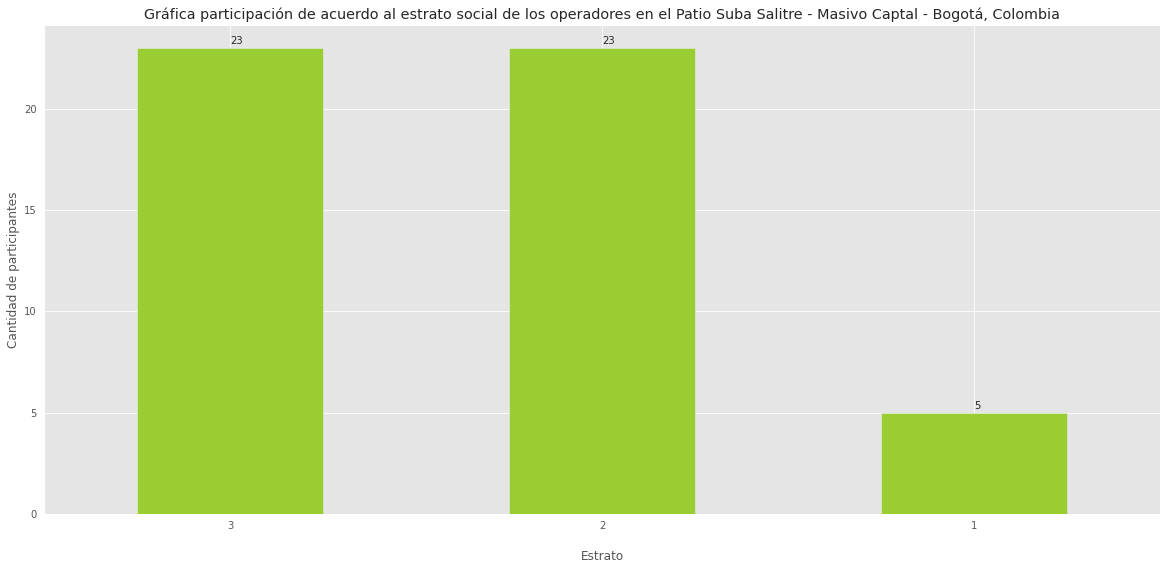

In [ ]:
## Distribución de los estratos
plt.style.use("ggplot")   
plt.figure(figsize = (20,9))
plt.title("Gráfica participación de acuerdo al estrato social de los operadores en el Patio Suba Salitre - Masivo Captal - Bogotá, Colombia",)
plt.xlabel("\nEstrato")      
plt.ylabel("Cantidad de participantes")           
tabla_frecuencia_AAB16["frec_abs_AAB16"].plot(kind="bar",color = "yellowgreen")

for label, annot in enumerate(tabla_frecuencia_AAB16['frec_abs_AAB16']):  
  plt.annotate(str(annot),xy=(label,annot + 0.2))

plt.xticks(rotation = 0)
plt.show()

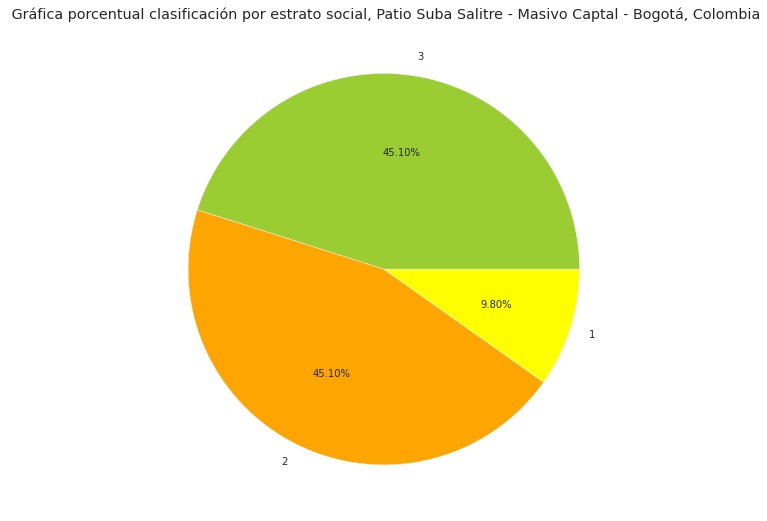

In [ ]:
plt.figure(figsize = (20,9))
plt.pie(tabla_frecuencia_AAB16['frec_abs_AAB16'],labels = tabla_frecuencia_AAB16.index,
        colors = ["yellowgreen", "orange", "yellow"], autopct='%.2f%%')
plt.title(" Gráfica porcentual clasificación por estrato social, Patio Suba Salitre - Masivo Captal - Bogotá, Colombia",)
plt.show()

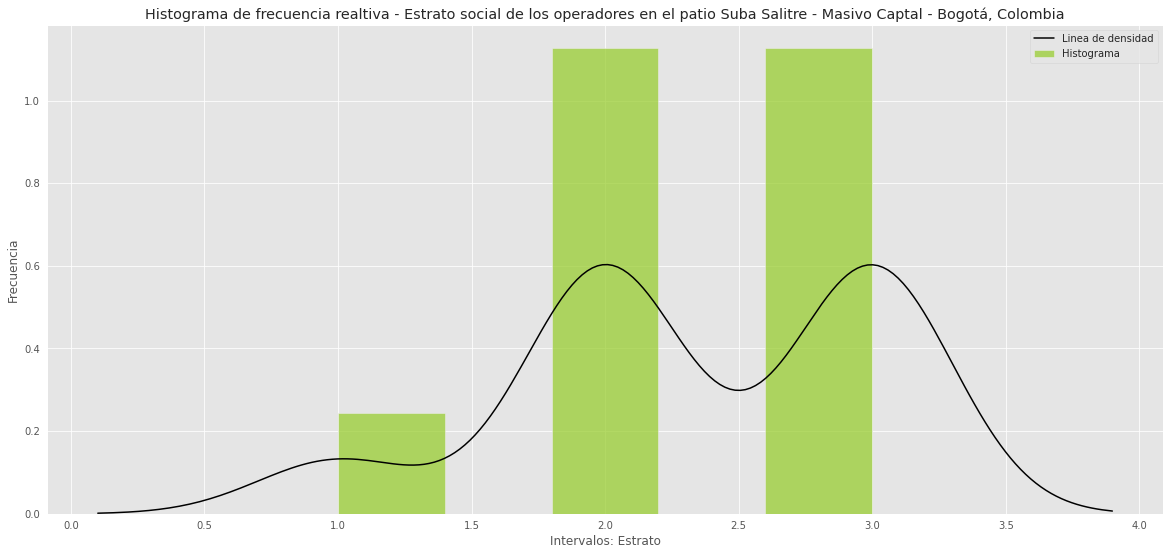

In [ ]:
plt.figure(figsize = (20,9))
sns.histplot(data = df_inf , x = "ESTRATO",bins =5,color = "yellowgreen",stat='density', label = "Histograma")
sns.kdeplot(data = df_inf , x = "ESTRATO", color = "black", label = "Linea de densidad")
plt.xlabel("Intervalos: Estrato",)
plt.ylabel("Frecuencia")
plt.title("Histograma de frecuencia realtiva - Estrato social de los operadores en el patio Suba Salitre - Masivo Captal - Bogotá, Colombia",)
plt.legend()
plt.show()

Recuerda que la frecuencia relativa de un intervalo se calcula dividiendo su frecuencia absoluta entre el número total de datos.

In [ ]:
fig = px.scatter(df_inf, x = "PATIO", y = "EDAD", hover_name = "ESTRATO", color = "ESTRATO",
                title= "Gráfica de la distribución según estrato social y el rango de edades de los operadores en el patio Suba Salitre - Masivo Captal - Bogotá, Colombia",
                hover_data = {"ESTRATO":True})
fig.show()

# ***Observaciones:***

- ***En el patio Suba Salitre, 23 individuos hacen parte del estrato tres, 23 el estrato dos y cinco en el estrato uno***

- ***La densidad se concentra sobre el estrato dos y tres, dado que sobre ambos se registra la misma cantidad de población.***

- ***La presencia según estrato social y el rango de edades de los operadores en el patio se descompone de la siguiente manera:***

 1. ***Estrato uno:***  Rangos de edades entre 36 a 40 y 26 a 30 años.
 2. ***Estrato dos:***  Rangos de edades entre  56 a 60, 41 a 45, y 31 a 35 años.
 3. ***Estrato tres:*** Rangos de edades entre 51 a 55, >61, 18 a 25 años.
 

************************************************************************************************************************************************************************************************************************************************

# ***3.3. Gráficos distribución experiencia operadores Patio Suba Salitre, Masivo Capital:***

 ***Catergorias:***

  - Experiencia Formal en Transporte (Transporte de Carga, mercancías u otras)= 99

- Experiencia en Transporte Público (bus interurbano, Transporte escolar, Taxi, Uber, Cafiby y Movilmove)= 100

- Experiencia en el sistema integrado de transporte público (SITP)= 101
- Trasmilenio= 102
- Ventas = 103
- Artes gráficas como conductor = 104
- Experiencia en Transporte Público (bus interurbano, Transporte Corriente, Transporte escolar, Taxi, Uber, Cafiby y Movilmove)= 105

- Particular = 106

- Multinacional = 107

- Volquetas y taxi = 108

In [ ]:
frec_abs_EXPERIENCIA = df_inf["EXPERIENCIA ANTERIOR"].value_counts()
frec_abs_EXPERIENCIA.rename("frec_abs_EXPERIENCIA", inplace = True)
Frecuencia_relativa_EXPERIENCIA = df_inf["EXPERIENCIA ANTERIOR"].value_counts(normalize = True)
Frecuencia_relativa_EXPERIENCIA.rename("Frecuencia_relativa_EXPERIENCIA", inplace = True)
Frecuencia_relativa_porcentual_EXPERIENCIA= df_inf["EXPERIENCIA ANTERIOR"].value_counts(normalize = True)*100
Frecuencia_relativa_porcentual_EXPERIENCIA.rename("Frecuencia_relativa_porcentual_EXPERIENCIA", inplace = True)
tabla_frecuencia_EXPERIENCIA = pd.concat([frec_abs_EXPERIENCIA,Frecuencia_relativa_EXPERIENCIA,Frecuencia_relativa_porcentual_EXPERIENCIA],axis=1)
total = pd.DataFrame(tabla_frecuencia_EXPERIENCIA.apply(sum,axis=0), columns=["TOTALES"]).T
pd.concat([tabla_frecuencia_EXPERIENCIA,total],axis = 0)

,frec_abs_EXPERIENCIA,Frecuencia_relativa_EXPERIENCIA,Frecuencia_relativa_porcentual_EXPERIENCIA
105,29.0,0.568627,56.862745
99,16.0,0.313725,31.372549
101,3.0,0.058824,5.882353
106,1.0,0.019608,1.960784
107,1.0,0.019608,1.960784
108,1.0,0.019608,1.960784
TOTALES,51.0,1.000000,100.000000


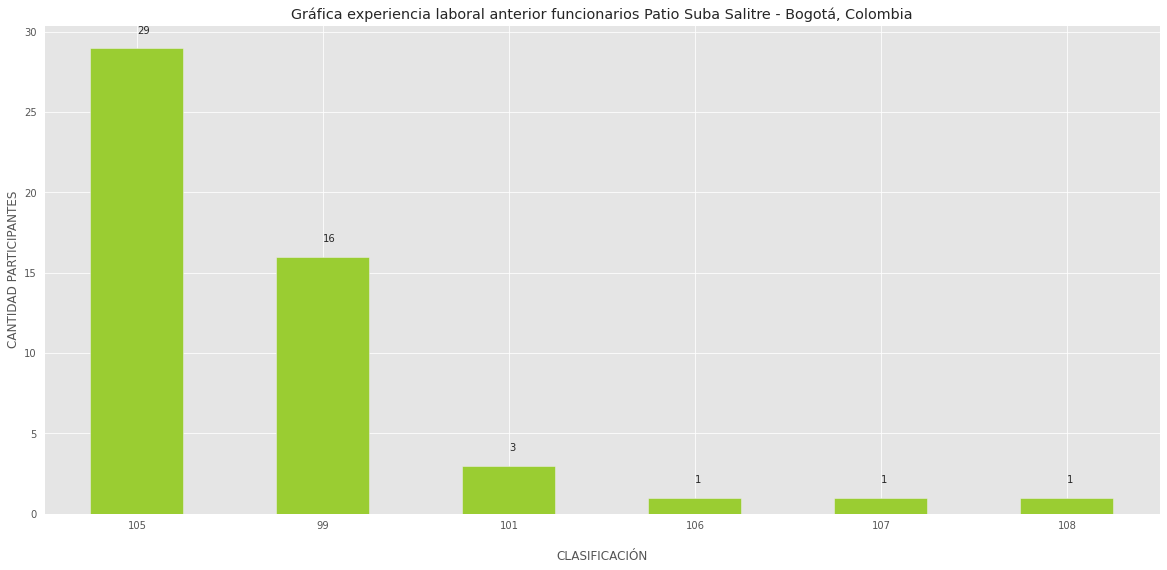

In [ ]:
plt.style.use("ggplot") 
plt.figure(figsize = (20,9))
plt.title("Gráfica experiencia laboral anterior funcionarios Patio Suba Salitre - Bogotá, Colombia",)
plt.xlabel("\nCLASIFICACIÓN") 
plt.ylabel("CANTIDAD PARTICIPANTES") 
tabla_frecuencia_EXPERIENCIA["frec_abs_EXPERIENCIA"].plot(kind="bar",color = "yellowgreen")

for label, annot in enumerate(tabla_frecuencia_EXPERIENCIA['frec_abs_EXPERIENCIA']):  
  plt.annotate(str(annot),xy=(label,annot + 0.9))

plt.xticks(rotation = 0)
plt.show()

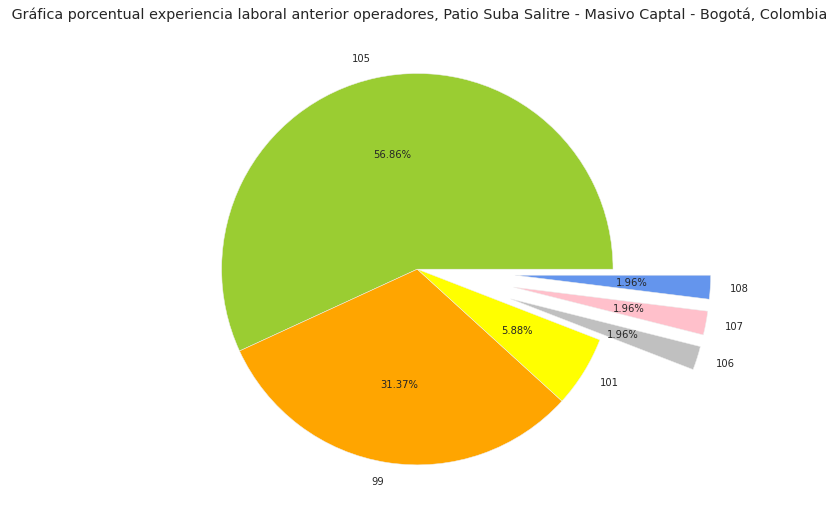

In [ ]:
plt.figure(figsize = (20,9))
explode = [0, 0, 0, 0.5, 0.5, 0.5,]
plt.pie(tabla_frecuencia_EXPERIENCIA['frec_abs_EXPERIENCIA'],labels = tabla_frecuencia_EXPERIENCIA.index,
        colors = ["yellowgreen","orange","yellow","silver","pink","cornflowerblue","greenyellow"], autopct='%.2f%%',explode =explode  )
plt.title(" Gráfica porcentual experiencia laboral anterior operadores, Patio Suba Salitre - Masivo Captal - Bogotá, Colombia",)
plt.show()

Revisemos los accidentes de acuerdo a experiencia laboral anterior:

In [ ]:
round(pd.crosstab(df_inf['ACCIDENTE_SIMPLE'], df_inf['EXPERIENCIA ANTERIOR'] , normalize = "index"),2)*100

EXPERIENCIA ANTERIOR,99,101,105,106,107,108
ACCIDENTE_SIMPLE,,,,,,
0,33.0,7.0,53.0,3.0,0.0,3.0
1,30.0,0.0,65.0,0.0,5.0,0.0
2,0.0,100.0,0.0,0.0,0.0,0.0


In [ ]:
round(pd.crosstab(df_inf['ACCIDENTE_CON_LESIONADO'], df_inf['EXPERIENCIA ANTERIOR'] , normalize = "index"),2)*100

EXPERIENCIA ANTERIOR,99,101,105,106,107,108
ACCIDENTE_CON_LESIONADO,,,,,,
0,31.0,7.0,56.0,2.0,2.0,2.0
1,33.0,0.0,67.0,0.0,0.0,0.0


In [ ]:
round(pd.crosstab(df_inf['ACCIDENTE_CON_MUERTO'], df_inf['EXPERIENCIA ANTERIOR'] , normalize = "index"),2)*100

EXPERIENCIA ANTERIOR,99,101,105,106,107,108
ACCIDENTE_CON_MUERTO,,,,,,
0,31.0,6.0,57.0,2.0,2.0,2.0


# ***Observaciones:***

 - La experiencia laboral más común dentro de los operadores del patio es  Transporte Público (bus interurbano, Transporte Corriente, Transporte escolar, Taxi, Uber, Cafiby y Movilmove) clasificada dentro de la categoría 105, con 29 funcionarios que representan el 56.86%, seguido de Experiencia Formal en Transporte (Transporte de Carga, mercancías u otras), con 16 funcionarios con que representa el 31.37%, las mas bajas son las experiencias laborales clasificadas en las categorías 108,107 y 106. Ver tabla de categorías.


****************************************************************************************************************************************************************

# ***3.4. Gráficos distribución estado civil operadores Patio Suba Salitre, Masivo Capital:***

In [ ]:
frec_abs_CIVIL = df_inf["ESTADO CIVIL"].value_counts()
frec_abs_CIVIL.rename("frec_abs_CIVIL", inplace = True)
Frecuencia_relativa_CIVIL = df_inf["ESTADO CIVIL"].value_counts(normalize = True)
Frecuencia_relativa_CIVIL.rename("Frecuencia_relativa_CIVIL", inplace = True)
Frecuencia_relativa_porcentual_CIVIL= df_inf["ESTADO CIVIL"].value_counts(normalize = True)*100
Frecuencia_relativa_porcentual_CIVIL.rename("Frecuencia_relativa_porcentual_CIVIL", inplace = True)

tabla_frecuencia_CIVIL = pd.concat([frec_abs_CIVIL,Frecuencia_relativa_CIVIL,Frecuencia_relativa_porcentual_CIVIL],axis=1)
total = pd.DataFrame(tabla_frecuencia_CIVIL.apply(sum,axis=0), columns=["TOTALES"]).T
pd.concat([tabla_frecuencia_CIVIL,total],axis = 0)

,frec_abs_CIVIL,Frecuencia_relativa_CIVIL,Frecuencia_relativa_porcentual_CIVIL
Unión libre,24.0,0.470588,47.058824
Casado,17.0,0.333333,33.333333
Soltero,9.0,0.176471,17.647059
Viudo,1.0,0.019608,1.960784
TOTALES,51.0,1.000000,100.000000


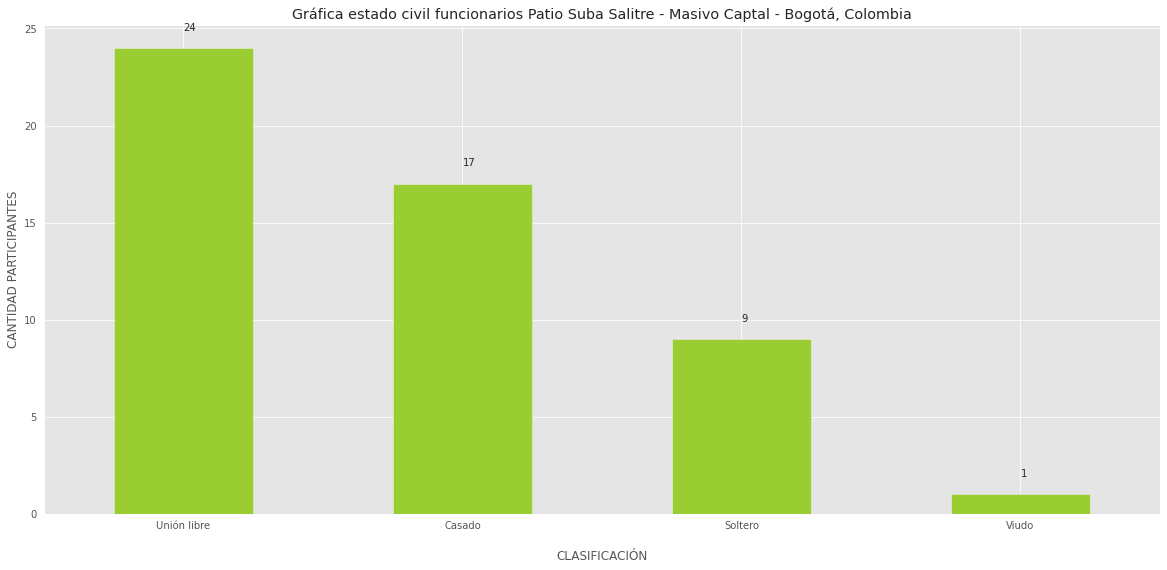

In [ ]:
plt.style.use("ggplot") 
plt.figure(figsize = (20,9))
plt.title("Gráfica estado civil funcionarios Patio Suba Salitre - Masivo Captal - Bogotá, Colombia",)
plt.xlabel("\nCLASIFICACIÓN") 
plt.ylabel("CANTIDAD PARTICIPANTES") 
tabla_frecuencia_CIVIL["frec_abs_CIVIL"].plot(kind="bar",color = "yellowgreen")

for label, annot in enumerate(tabla_frecuencia_CIVIL['frec_abs_CIVIL']):  
  plt.annotate(str(annot),xy=(label,annot + 0.9))

plt.xticks(rotation = 0)
plt.show()

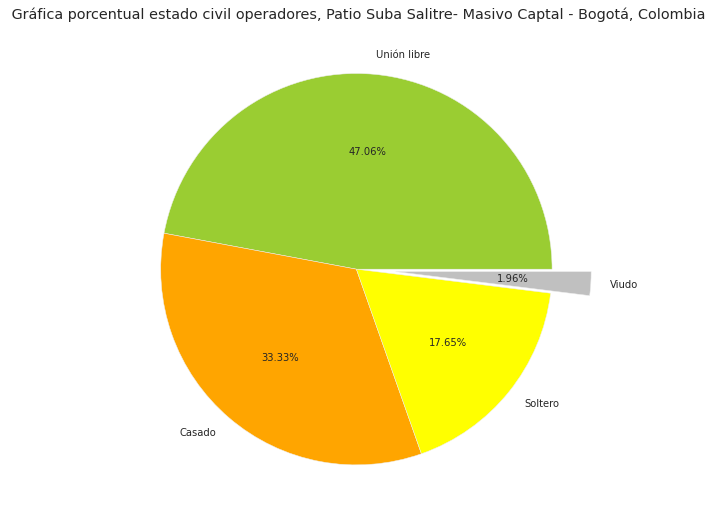

In [ ]:
plt.figure(figsize = (20,9))
explode = [0, 0, 0, 0.2,]
plt.pie(tabla_frecuencia_CIVIL['frec_abs_CIVIL'],labels = tabla_frecuencia_CIVIL.index,
        colors = ["yellowgreen","orange","yellow","silver","pink",], autopct='%.2f%%', explode = explode)
plt.title(" Gráfica porcentual estado civil operadores, Patio Suba Salitre- Masivo Captal - Bogotá, Colombia",)
plt.show()

# ***Observaciones:***

- El estado civil que predomina entre los operadores del patio es la unión Libre, 24 funcionarios están clasificados dentro de ella y  equivale al 47.06%.

- Los casados son 27 funcionarios con el 33.33%
- Solteros son 9 con el 17.65%
- Los funcionarios Separados y/o divorsiados, viudos es un operador que representan el 1.96%

****************************************************************************************************************************************************************

# ***3.5. Gráficos distribución responsabilidad operadores Patio Suba Salitre, Masivo Capital:***

In [ ]:
frec_abs_AAB18 = df_inf["AAB18"].value_counts()
frec_abs_AAB18.rename("frec_abs_AAB18", inplace = True)
Frecuencia_relativa_AAB18 = df_inf["AAB18"].value_counts(normalize = True)
Frecuencia_relativa_AAB18.rename("Frecuencia_relativa_AAB18", inplace = True)
Frecuencia_relativa_porcentual_AAB18= df_inf["AAB18"].value_counts(normalize = True)*100
Frecuencia_relativa_porcentual_AAB18.rename("Frecuencia_relativa_porcentual_AAB18", inplace = True)

tabla_frecuencia_AAB18 = pd.concat([frec_abs_AAB18,Frecuencia_relativa_AAB18,Frecuencia_relativa_porcentual_AAB18],axis=1)
total = pd.DataFrame(tabla_frecuencia_AAB18.apply(sum,axis=0), columns=["TOTALES"]).T
pd.concat([tabla_frecuencia_AAB18,total],axis = 0)

,frec_abs_AAB18,Frecuencia_relativa_AAB18,Frecuencia_relativa_porcentual_AAB18
SI,33.0,0.647059,64.705882
NO,18.0,0.352941,35.294118
TOTALES,51.0,1.000000,100.000000


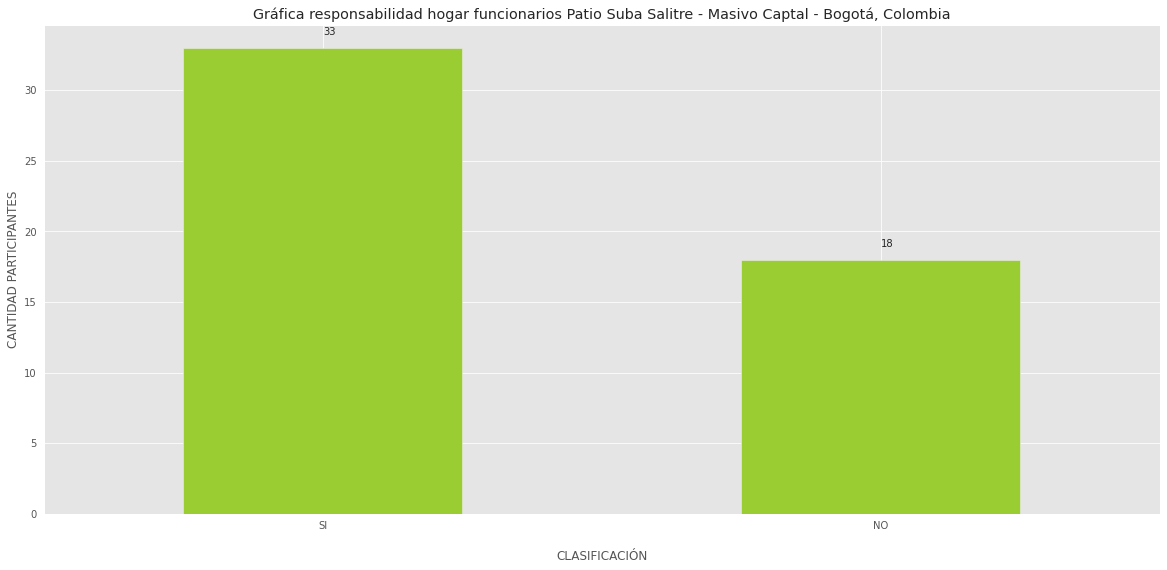

In [ ]:
plt.style.use("ggplot") 
plt.figure(figsize = (20,9))
plt.title("Gráfica responsabilidad hogar funcionarios Patio Suba Salitre - Masivo Captal - Bogotá, Colombia",)
plt.xlabel("\nCLASIFICACIÓN") 
plt.ylabel("CANTIDAD PARTICIPANTES") 
tabla_frecuencia_AAB18["frec_abs_AAB18"].plot(kind="bar",color = "yellowgreen")

for label, annot in enumerate(tabla_frecuencia_AAB18['frec_abs_AAB18']):  
  plt.annotate(str(annot),xy=(label,annot + 0.9))

plt.xticks(rotation = 0)
plt.show()

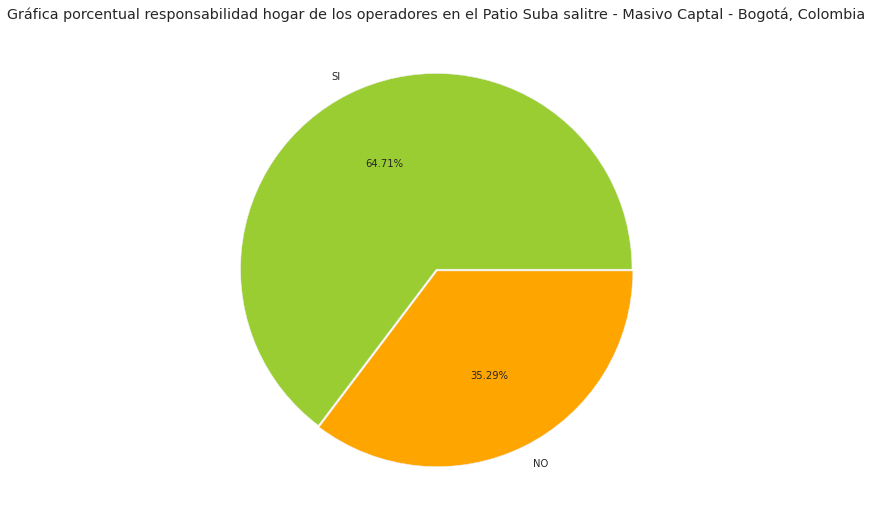

In [ ]:
plt.figure(figsize = (20,9))
explode = [0, 0.01]
plt.pie(tabla_frecuencia_AAB18['frec_abs_AAB18'],labels = tabla_frecuencia_AAB18.index,
        colors = ["yellowgreen", "orange"], autopct='%.2f%%',explode = explode)
plt.title("Gráfica porcentual responsabilidad hogar de los operadores en el Patio Suba salitre - Masivo Captal - Bogotá, Colombia",)
plt.show()

# ***Observaciones:***

- La responsobilidad respecto a cabeza de familias la comparten 33 funcionarios con el 64.71% de la población.

- 18  Funcionarios responden no ser, este dato representa el 35.29%.

****************************************************************************************************************************************************************

# ***3.6. Gráficos distribución nivel académico operadores Patio Suba Salitre, Masivo Capital:***

In [ ]:
frec_abs_NIVEL_ACADEMICO = df_inf["NIVEL ACADEMICO"].value_counts()
frec_abs_NIVEL_ACADEMICO.rename("frec_abs_NIVEL_ACADEMICO", inplace = True)
Frecuencia_relativa_NIVEL_ACADEMICO= df_inf["NIVEL ACADEMICO"].value_counts(normalize = True)
Frecuencia_relativa_NIVEL_ACADEMICO.rename("Frecuencia_relativa_NIVEL_ACADEMICO", inplace = True)
Frecuencia_relativa_porcentual_NIVEL_ACADEMICO= df_inf["NIVEL ACADEMICO"].value_counts(normalize = True)*100
Frecuencia_relativa_porcentual_NIVEL_ACADEMICO.rename("Frecuencia_relativa_porcentual_NIVEL_ACADEMICO", inplace = True)

tabla_frecuencia_NIVEL_ACADEMICO = pd.concat([frec_abs_NIVEL_ACADEMICO,Frecuencia_relativa_NIVEL_ACADEMICO,Frecuencia_relativa_porcentual_NIVEL_ACADEMICO],axis=1)
total = pd.DataFrame(tabla_frecuencia_NIVEL_ACADEMICO.apply(sum,axis=0), columns=["TOTALES"]).T
pd.concat([tabla_frecuencia_NIVEL_ACADEMICO,total],axis = 0)

,frec_abs_NIVEL_ACADEMICO,Frecuencia_relativa_NIVEL_ACADEMICO,Frecuencia_relativa_porcentual_NIVEL_ACADEMICO
Bachillerato,33.0,0.647059,64.705882
Primaria,12.0,0.235294,23.529412
Profesional,4.0,0.078431,7.843137
Técnico,2.0,0.039216,3.921569
TOTALES,51.0,1.000000,100.000000


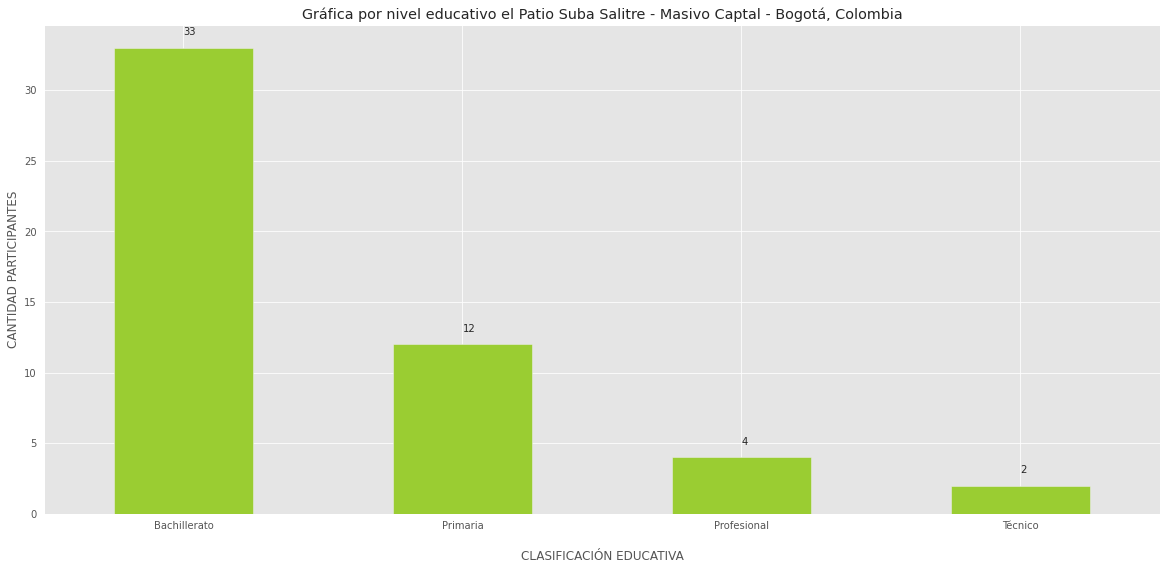

In [ ]:
plt.style.use("ggplot") 
plt.figure(figsize = (20,9))
plt.title("Gráfica por nivel educativo el Patio Suba Salitre - Masivo Captal - Bogotá, Colombia",)
plt.xlabel("\nCLASIFICACIÓN EDUCATIVA") 
plt.ylabel("CANTIDAD PARTICIPANTES") 
tabla_frecuencia_NIVEL_ACADEMICO ["frec_abs_NIVEL_ACADEMICO"].plot(kind="bar",color = "yellowgreen")

for label, annot in enumerate(tabla_frecuencia_NIVEL_ACADEMICO ['frec_abs_NIVEL_ACADEMICO']):  
  plt.annotate(str(annot),xy=(label,annot + 0.9))

plt.xticks(rotation = 0)
plt.show()

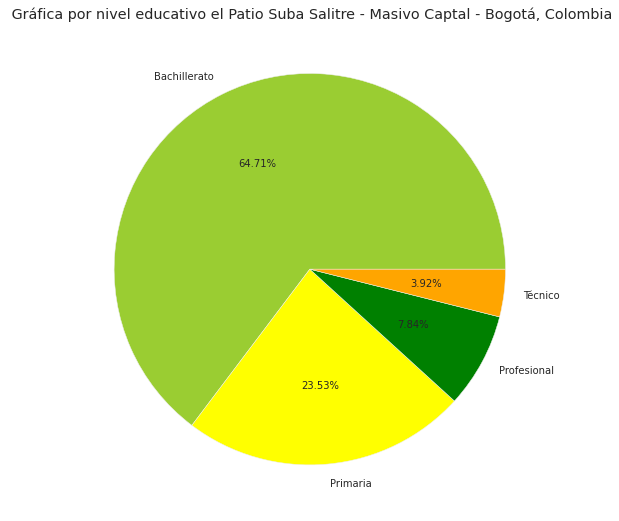

In [ ]:
## pie plot
plt.figure(figsize = (20,9))
plt.pie(tabla_frecuencia_NIVEL_ACADEMICO['frec_abs_NIVEL_ACADEMICO'],labels = tabla_frecuencia_NIVEL_ACADEMICO.index,
        colors = ["yellowgreen", "Yellow", "green","orange"], autopct='%.2f%%')
plt.title(" Gráfica por nivel educativo el Patio Suba Salitre - Masivo Captal - Bogotá, Colombia",)
plt.show()

# ***4. Percepción en la conducción  Patio Suba Salitre, Masivo Capital***

- ***¿CONOCE USTED, ¿CUÁLES SON SUS FUNCIONES Y LOS DIFERENTES DESINCENTIVOS RELACIONADOS CON LA OPERACIÓN? (MULTAS POR CONDUCTAS OPERACIONALES, PERIODOS DE RECAPACITACIÓN)***

 -  Código de pregunta: ***AAB45***

In [ ]:
frec_abs_DESINCENTIVOS_OPERACION= df_inf["DESINCENTIVOS_OPERACION"].value_counts()
frec_abs_DESINCENTIVOS_OPERACION.rename("frec_abs_DESINCENTIVOS_OPERACION", inplace = True)
Frecuencia_relativa_DESINCENTIVOS_OPERACION = df_inf["DESINCENTIVOS_OPERACION"].value_counts(normalize = True)
Frecuencia_relativa_DESINCENTIVOS_OPERACION.rename("Frecuencia_relativa_DESINCENTIVOS_OPERACION", inplace = True)
Frecuencia_relativa_porcentual_DESINCENTIVOS_OPERACION = df_inf["DESINCENTIVOS_OPERACION"].value_counts(normalize = True)*100
Frecuencia_relativa_porcentual_DESINCENTIVOS_OPERACION.rename("Frecuencia_relativa_porcentual_DESINCENTIVOS_OPERACION", inplace = True)
tabla_frecuencia = pd.concat([frec_abs_DESINCENTIVOS_OPERACION,Frecuencia_relativa_DESINCENTIVOS_OPERACION,Frecuencia_relativa_porcentual_DESINCENTIVOS_OPERACION],axis=1)
total = pd.DataFrame(tabla_frecuencia.apply(sum,axis=0), columns=["TOTALES"]).T
pd.concat([tabla_frecuencia,total],axis = 0)

,frec_abs_DESINCENTIVOS_OPERACION,Frecuencia_relativa_DESINCENTIVOS_OPERACION,Frecuencia_relativa_porcentual_DESINCENTIVOS_OPERACION
SI,47.0,0.921569,92.156863
NO,4.0,0.078431,7.843137
TOTALES,51.0,1.000000,100.000000


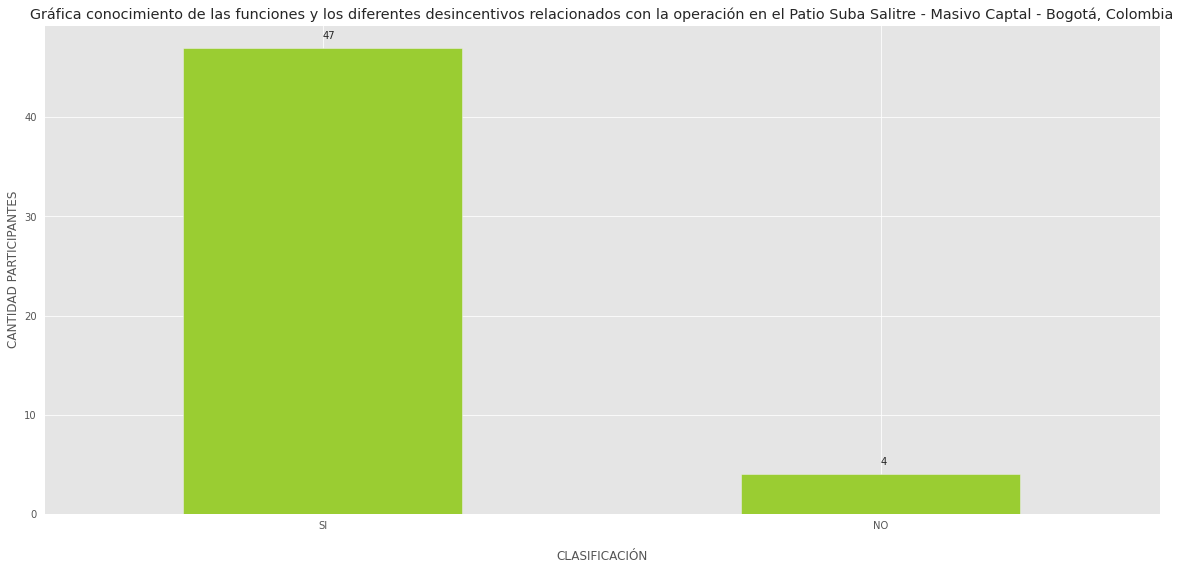

In [ ]:
plt.style.use("ggplot") 
plt.figure(figsize = (20,9))
plt.title("Gráfica conocimiento de las funciones y los diferentes desincentivos relacionados con la operación en el Patio Suba Salitre - Masivo Captal - Bogotá, Colombia",)
plt.xlabel("\nCLASIFICACIÓN") 
plt.ylabel("CANTIDAD PARTICIPANTES") 
tabla_frecuencia["frec_abs_DESINCENTIVOS_OPERACION"].plot(kind="bar",color = "yellowgreen")

for label, annot in enumerate(tabla_frecuencia['frec_abs_DESINCENTIVOS_OPERACION']):  
  plt.annotate(str(annot),xy=(label,annot + 0.9))

plt.xticks(rotation = 0)
plt.show()

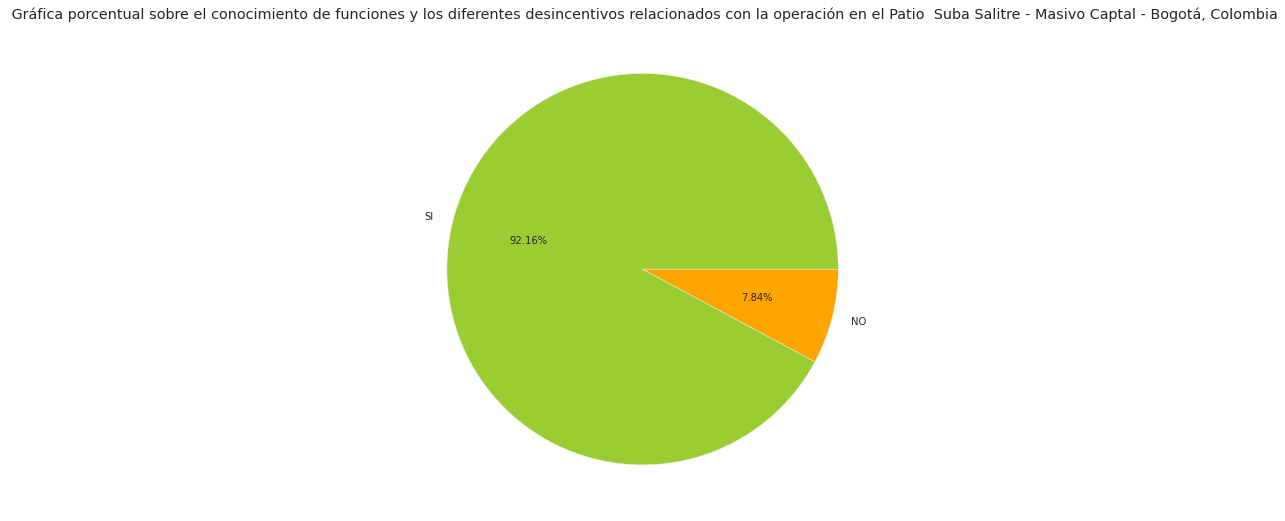

In [ ]:
## pie plot
plt.figure(figsize = (20,9))
plt.pie(tabla_frecuencia['frec_abs_DESINCENTIVOS_OPERACION'],labels = tabla_frecuencia.index,
        colors = ["yellowgreen", "orange"], autopct='%.2f%%')
plt.title(" Gráfica porcentual sobre el conocimiento de funciones y los diferentes desincentivos relacionados con la operación en el Patio  Suba Salitre - Masivo Captal - Bogotá, Colombia",)
plt.show()

*******************************************************************************************************************************

In [ ]:
round(pd.crosstab(df_inf['NIVEL ACADEMICO'], df_inf['DESINCENTIVOS_OPERACION'] , normalize = "index"),2)*100

DESINCENTIVOS_OPERACION,NO,SI
NIVEL ACADEMICO,,
Bachillerato,12.0,88.0
Primaria,0.0,100.0
Profesional,0.0,100.0
Técnico,0.0,100.0


In [ ]:
round(pd.crosstab(df_inf['AAB46'], df_inf['DESINCENTIVOS_OPERACION'] , normalize = "index"),2)*100

DESINCENTIVOS_OPERACION,NO,SI
AAB46,,
0,50.0,50.0
1,0.0,100.0
2,0.0,100.0
3,0.0,100.0
4,0.0,100.0
5,0.0,100.0
6,0.0,100.0
7,0.0,100.0
8,0.0,100.0


In [ ]:
round(pd.crosstab(df_inf['ANTIGUEDAD_CONDUCIENDO'], df_inf['DESINCENTIVOS_OPERACION'] , normalize = "index"),2)*100

DESINCENTIVOS_OPERACION,NO,SI
ANTIGUEDAD_CONDUCIENDO,,
1,0.0,100.0
2,33.0,67.0
4,0.0,100.0
6,0.0,100.0
8,12.0,88.0
11,7.0,93.0


************************************************************************************************************************************************************************************************************************************************

- ***¿QUÉ TAN SATISFECHO SE ENCUENTRA CON EL PROTOCOLO DE DESINCENTIVOS RELACIONADOS CON LA OPERACIÓN?***

 - Código de pregunta: AAB46

In [ ]:
frec_abs_DESINCENTIVOS_AAB46= df_inf["AAB46"].value_counts()
frec_abs_DESINCENTIVOS_AAB46.rename("frec_abs_DESINCENTIVOS_AAB46", inplace = True)
Frecuencia_relativa_DESINCENTIVOS_AAB46 = df_inf["AAB46"].value_counts(normalize = True)
Frecuencia_relativa_DESINCENTIVOS_AAB46.rename("Frecuencia_relativa_DESINCENTIVOS_AAB46", inplace = True)
Frecuencia_relativa_porcentual_DESINCENTIVOS_AAB46 = df_inf["AAB46"].value_counts(normalize = True)*100
Frecuencia_relativa_porcentual_DESINCENTIVOS_AAB46.rename("Frecuencia_relativa_porcentual_DESINCENTIVOS_AAB46", inplace = True)
tabla_frecuencia = pd.concat([frec_abs_DESINCENTIVOS_AAB46,Frecuencia_relativa_DESINCENTIVOS_AAB46,Frecuencia_relativa_porcentual_DESINCENTIVOS_AAB46],axis=1)
total = pd.DataFrame(tabla_frecuencia.apply(sum,axis=0), columns=["TOTALES"]).T
pd.concat([tabla_frecuencia,total],axis = 0)

,frec_abs_DESINCENTIVOS_AAB46,Frecuencia_relativa_DESINCENTIVOS_AAB46,Frecuencia_relativa_porcentual_DESINCENTIVOS_AAB46
3,8.0,0.156863,15.686275
0,8.0,0.156863,15.686275
5,7.0,0.137255,13.725490
7,6.0,0.117647,11.764706
8,6.0,0.117647,11.764706
10,4.0,0.078431,7.843137
2,3.0,0.058824,5.882353
6,3.0,0.058824,5.882353
9,3.0,0.058824,5.882353
1,2.0,0.039216,3.921569


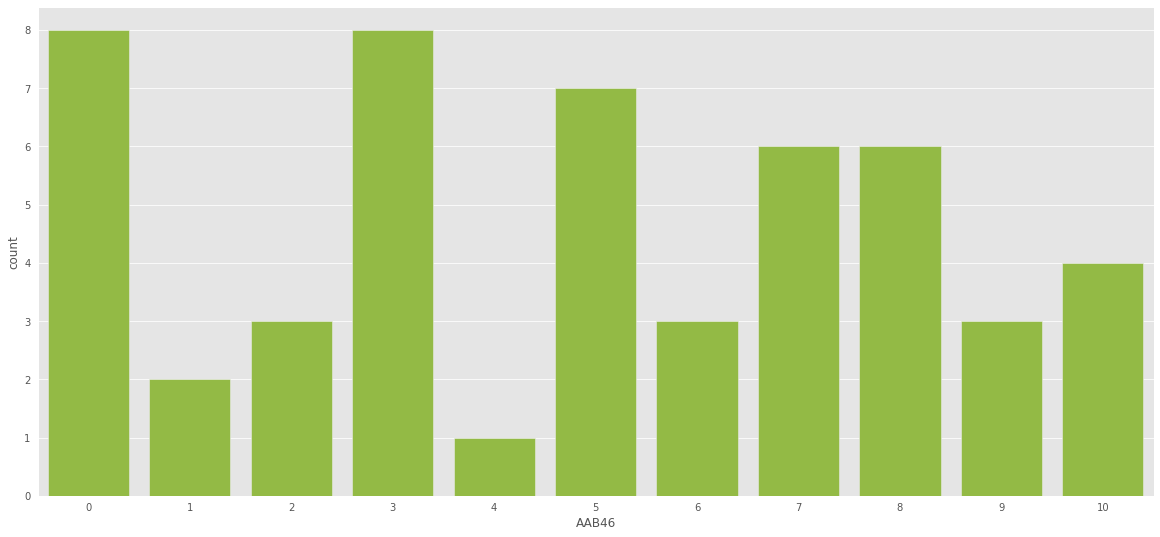

In [ ]:
plt.figure(figsize = (20,9))
sns.countplot(data = df_inf, x = "AAB46", color = "yellowgreen")
plt.show()

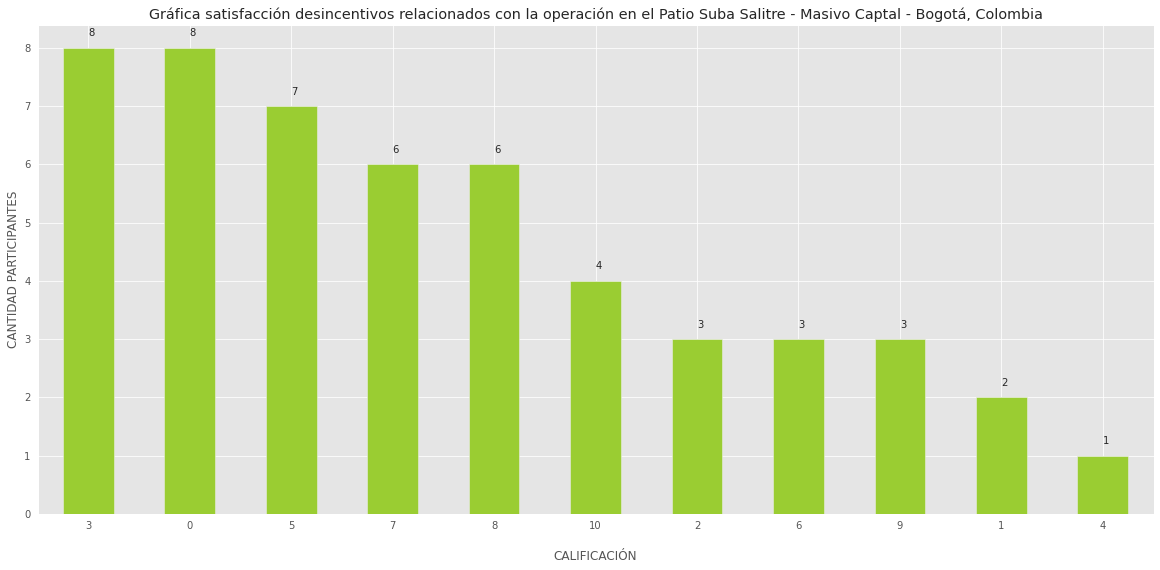

In [ ]:
plt.style.use("ggplot") 
plt.figure(figsize = (20,9))
plt.title("Gráfica satisfacción desincentivos relacionados con la operación en el Patio Suba Salitre - Masivo Captal - Bogotá, Colombia",)
plt.xlabel("\nCALIFICACIÓN") 
plt.ylabel("CANTIDAD PARTICIPANTES") 
tabla_frecuencia["frec_abs_DESINCENTIVOS_AAB46"].plot(kind="bar",color = "yellowgreen")

for label, annot in enumerate(tabla_frecuencia['frec_abs_DESINCENTIVOS_AAB46']):  
  plt.annotate(str(annot),xy=(label,annot + 0.2))

plt.xticks(rotation = 0)
plt.show()

In [ ]:
df_inf["AAB46"].mean()

4.823529411764706

***Indaguemos un poco más, quiénes o dónde se ve el inconformismo:***

 - Revísemos por estrato social:

<Figure size 1440x648 with 0 Axes>

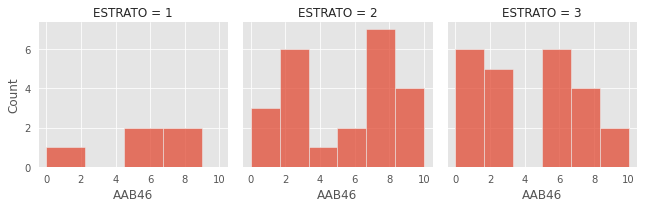

In [ ]:
plt.figure(figsize = (20,9),)
g = sns.FacetGrid(df_inf, col="ESTRATO",)
g.map_dataframe(sns.histplot, x="AAB46")
g.add_legend();
plt.show();



In [ ]:
fig = px.box(df_inf, y = "AAB46", color = "ESTRATO", 
             color_discrete_sequence = ["cornflowerblue","yellowgreen","orange",])
fig.update_layout(xaxis_title = "COMPARACIÓN ¿QUÉ TAN SATISFECHO SE ENCUENTRA CON EL PROTOCOLO DE DESINCENTIVOS RELACIONADOS CON LA OPERACIÓN SEPARADO POR ESTRATO SOCIAL?", yaxis_title = "Nivel de Satisfacción")
fig.show()

****************************************************************************************************************************************************************

- Revísemos por edad de la población:

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 1440x648 with 0 Axes>

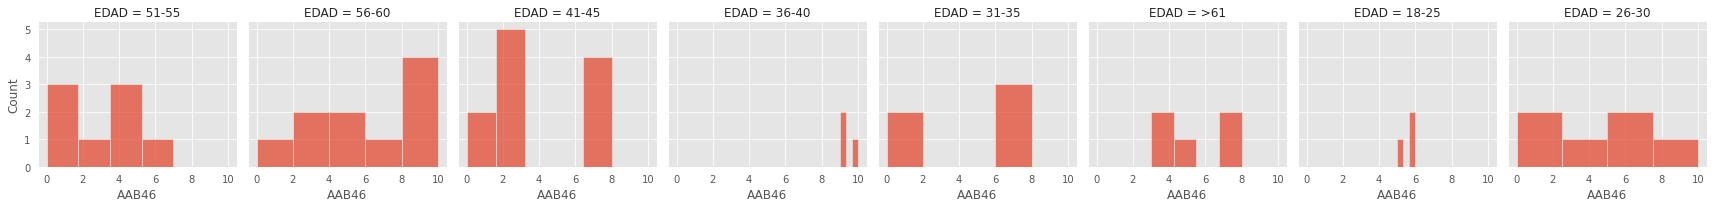

In [ ]:
plt.figure(figsize = (20,9))
g = sns.FacetGrid(df_inf, col="EDAD",)
g.map_dataframe(sns.histplot, x="AAB46")
g.add_legend()
plt.show

In [ ]:
fig = px.box(df_inf, y = "AAB46", color = "EDAD", 
             color_discrete_sequence = ["cornflowerblue","yellowgreen","orange","blue","green","red","pink","yellow","magenta",])
fig.update_layout(xaxis_title = "¿QUÉ TAN SATISFECHO SE ENCUENTRA CON EL PROTOCOLO DE DESINCENTIVOS RELACIONADOS CON LA OPERACIÓN SEPARADOS POR EDAD?", yaxis_title = "Nivel de Satisfacción")
fig.show()

****************************************************************************************************************************************************************

- Revísemos por nivel académico de la población:

<Figure size 1440x648 with 0 Axes>

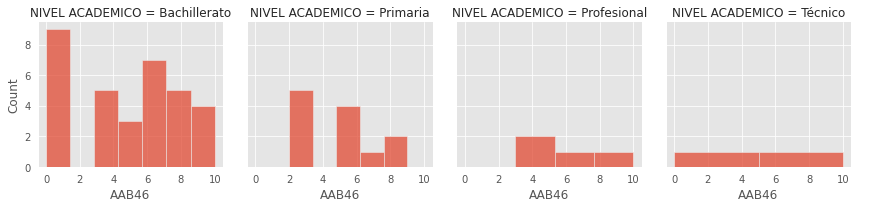

In [ ]:
plt.figure(figsize = (20,9))
g = sns.FacetGrid(df_inf, col="NIVEL ACADEMICO",)
g.map_dataframe(sns.histplot, x="AAB46")
g.add_legend();
plt.show;

In [ ]:
fig = px.box(df_inf, y = "AAB46", color = "NIVEL ACADEMICO", 
             color_discrete_sequence = ["cornflowerblue","yellowgreen","orange","blue","green","red","pink","yellow","magenta",])
fig.update_layout(xaxis_title = "¿QUÉ TAN SATISFECHO SE ENCUENTRA CON EL PROTOCOLO DE DESINCENTIVOS RELACIONADOS CON LA OPERACIÓN SEPARADOS POR NIVEL ACADEMICO?", yaxis_title = "Nivel de Satisfacción")
fig.show()

****************************************************************************************************************************************************************

- Revísemos por antigüedad laboral:

<Figure size 1440x648 with 0 Axes>

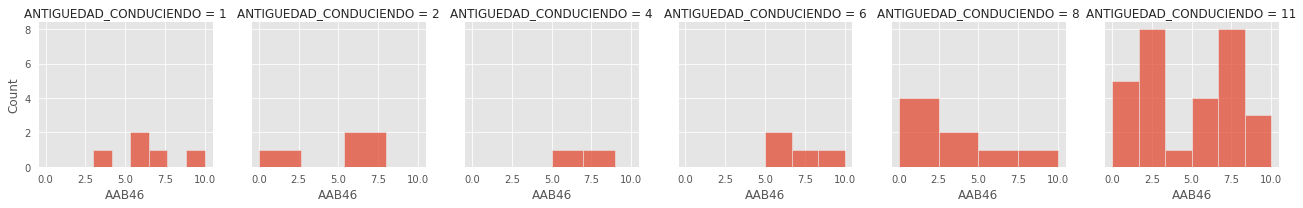

In [ ]:
plt.figure(figsize = (20,9))
g = sns.FacetGrid(df_inf, col="ANTIGUEDAD_CONDUCIENDO",)
g.map_dataframe(sns.histplot, x="AAB46")
g.add_legend();
plt.show;

In [ ]:
fig = px.box(df_inf, y = "AAB46", color = "ANTIGUEDAD_CONDUCIENDO", 
             color_discrete_sequence = ["cornflowerblue","yellowgreen","orange","blue","green","red","pink","yellow","magenta",])
fig.update_layout(xaxis_title = "¿QUÉ TAN SATISFECHO SE ENCUENTRA CON EL PROTOCOLO DE DESINCENTIVOS RELACIONADOS CON LA OPERACIÓN SEPARADOS POR ANTIGUEDAD LABORAL?", yaxis_title = "Nivel de Satisfacción")
fig.show()

********************************************************************************

Revísemos por el cargo que desempeña el funcionario:

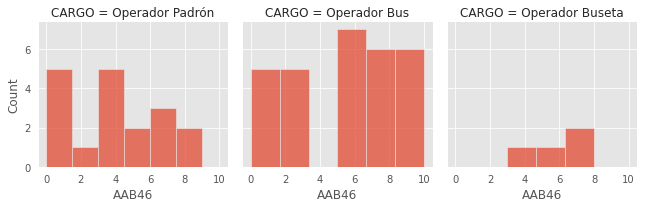

In [ ]:
g = sns.FacetGrid(df_inf, col="CARGO",)
g.map_dataframe(sns.histplot, x="AAB46")
g.add_legend();
plt.show;

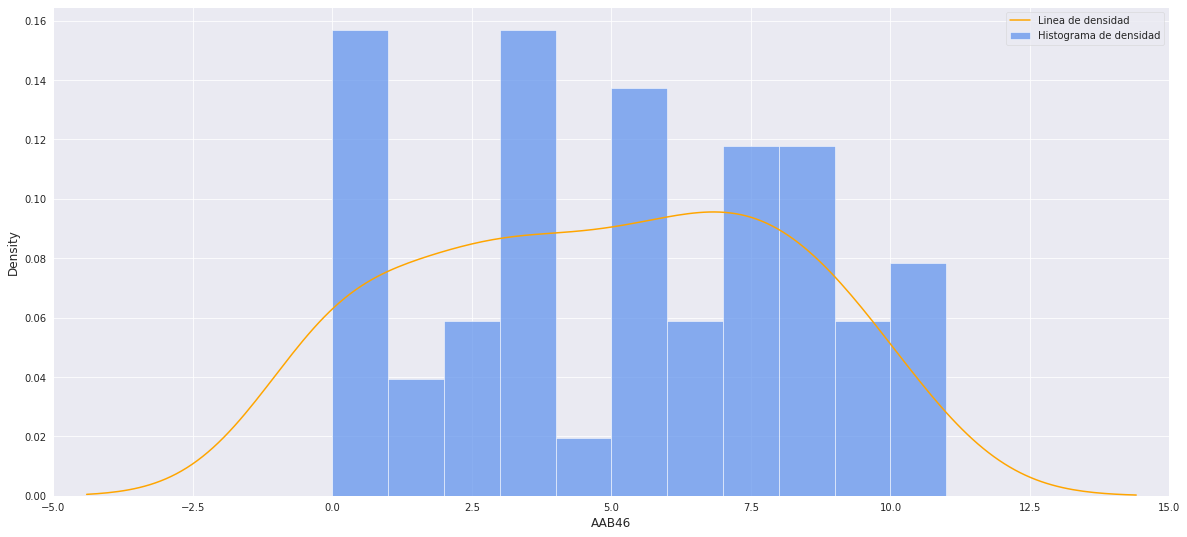

In [ ]:
sns.set_style("darkgrid")   ## Estilo de los plots.
plt.figure(figsize=(20,9))  ## Tamaño al plot
sns.histplot(data = df_inf, x = "AAB46", 
             stat="density",color="cornflowerblue",
             bins=range(-5,15), 
             label = "Histograma de densidad")
sns.kdeplot(data = df_inf, x = "AAB46", color = "orange", label = "Linea de densidad")
plt.xlim([-5,15])
plt.legend()
plt.show()

# ***Observaciones:***

- Los estratos "2" y "3" son los más insatisfechos con el protocolo, sin embargo su votación en promedio es de 5, esto significa un puntaje aceptable dentro del rango.

- El rango de edad que registra mayor inconformismo con el protocolo es el de 41 a 45 años de edad, el rango con mayor grado de satisfacción es el de 51 a 55 años.

- Respecto al grado de eduación de los operadores, los bachilleres, técnicos y primaria son los más inconformes con el protocolo, los más satisfechos son los profesionales.

- Los funcionarios con más de 11 años de antigüedad registran el mayor grado de  inconformidad. las demas estan sobre la mediana.

- La gráfica con linea de densidad muestra la distribución del grado de satisfacción, esta fue variada con concentración sobre su media.

************************************************************************************************************************************************************************************************************************************************

************************************************************************************************************************************************************************************************************************************************

# ***4.1 Entrenamiento y capacitación***

 - ***¿CONSIDERA QUE CUENTA CON LAS HERRAMIENTAS NECESARIAS PARA LA EJECUCIÓN DE SU LABOR, EN CUANTO A VEHÍCULOS SEGUROS?*** 

 Código de pregunta: ***AAB47***
 

In [ ]:
frec_abs_AAB47= df_inf["AAB47"].value_counts()
frec_abs_AAB47.rename("frec_abs_AAB47", inplace = True)
Frecuencia_relativa_AAB47 = df_inf["AAB47"].value_counts(normalize = True)
Frecuencia_relativa_AAB47.rename("Frecuencia_relativa_AAB47", inplace = True)
Frecuencia_relativa_porcentual_AAB47 = df_inf["AAB47"].value_counts(normalize = True)*100
Frecuencia_relativa_porcentual_AAB47.rename("Frecuencia_relativa_porcentual_AAB47", inplace = True)
tabla_frecuencia = pd.concat([frec_abs_AAB47,Frecuencia_relativa_AAB47,Frecuencia_relativa_porcentual_AAB47],axis=1)
total = pd.DataFrame(tabla_frecuencia.apply(sum,axis=0), columns=["TOTALES"]).T
pd.concat([tabla_frecuencia,total],axis = 0)


,frec_abs_AAB47,Frecuencia_relativa_AAB47,Frecuencia_relativa_porcentual_AAB47
SI,39.0,0.764706,76.470588
NO,12.0,0.235294,23.529412
TOTALES,51.0,1.000000,100.000000


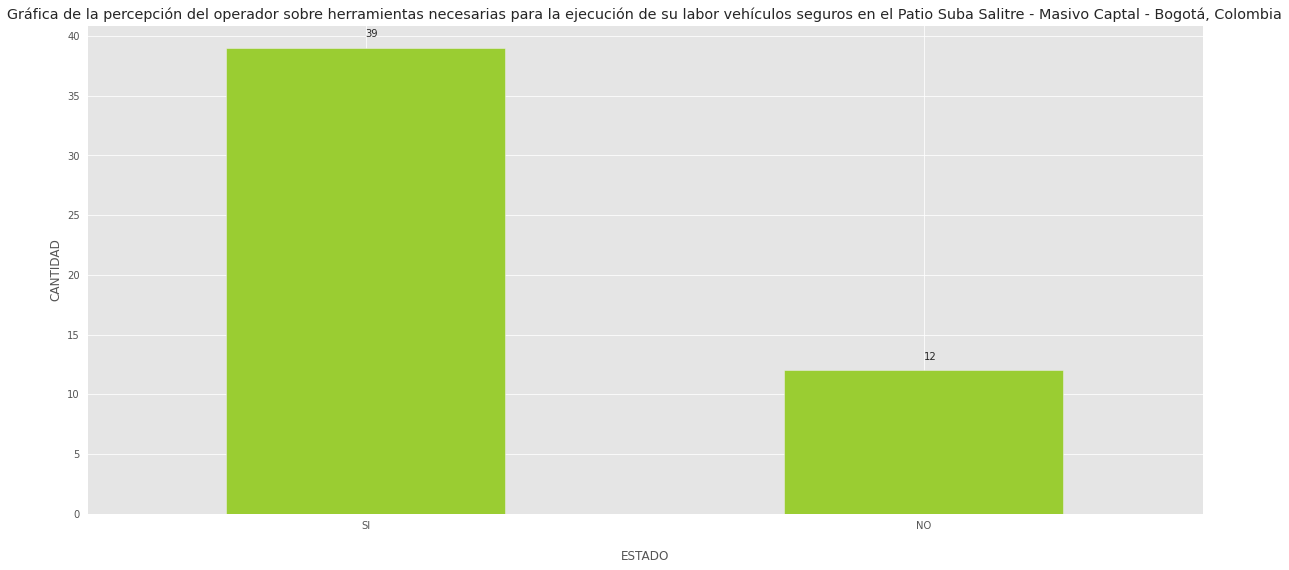

In [ ]:
plt.style.use("ggplot") 
plt.figure(figsize = (20,9))
plt.title("Gráfica de la percepción del operador sobre herramientas necesarias para la ejecución de su labor vehículos seguros en el Patio Suba Salitre - Masivo Captal - Bogotá, Colombia",)
plt.xlabel("\nESTADO") 
plt.ylabel("CANTIDAD") 
tabla_frecuencia["frec_abs_AAB47"].plot(kind="bar",color = "yellowgreen")

for label, annot in enumerate(tabla_frecuencia['frec_abs_AAB47']):  
  plt.annotate(str(annot),xy=(label,annot + 0.9))

plt.xticks(rotation = 0)
plt.show()

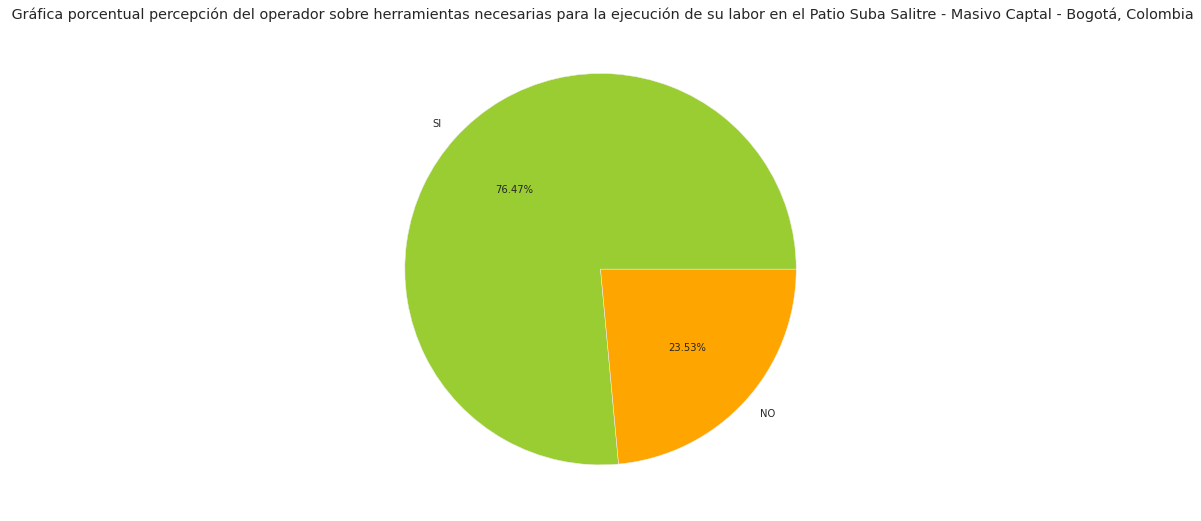

In [ ]:
plt.figure(figsize = (20,9))
plt.pie(tabla_frecuencia['frec_abs_AAB47'],labels = tabla_frecuencia.index,
        colors = ["yellowgreen", "orange"], autopct='%.2f%%')
plt.title(" Gráfica porcentual percepción del operador sobre herramientas necesarias para la ejecución de su labor en el Patio Suba Salitre - Masivo Captal - Bogotá, Colombia",)
plt.show()

In [ ]:
round(pd.crosstab(df_inf['ACCIDENTE_SIMPLE'], df_inf['AAB47'] , normalize = "index"),2)*100

AAB47,NO,SI
ACCIDENTE_SIMPLE,,
0,27.0,73.0
1,20.0,80.0
2,0.0,100.0


In [ ]:
round(pd.crosstab(df_inf['ACCIDENTE_CON_LESIONADO'], df_inf['AAB47'] , normalize = "index"),2)*100

AAB47,NO,SI
ACCIDENTE_CON_LESIONADO,,
0,27.0,73.0
1,0.0,100.0


In [ ]:
round(pd.crosstab(df_inf['ACCIDENTE_CON_MUERTO'], df_inf['AAB47'] , normalize = "index"),2)*100

AAB47,NO,SI
ACCIDENTE_CON_MUERTO,,
0,24.0,76.0


In [ ]:
crosstab1 = pd.crosstab(index = df_inf["AAB47"],       ## Las categorias que serán los indices.
                        columns = df_inf["AAB48"],     ## Las categorias que serán las columnas.
                        margins = True                 ## Totales por fila y columna.
                        )
crosstab1

AAB48,Falta de mantenimiento,All
AAB47,,
NO,12,12
All,12,12


- Los 12 funcionarios que dicen no contar con los elementos de vehículos seguros nos dan a conocer que la principal causa es la falta de mantenimiento dado que las razones se pueden clasificar en esa categoría genera, se deja como evidencia la tabla anterior.

****************************************************************************************************************************************************************

****************************************************************************************************************************************************************

- ***¿CONSIDERA QUE CUENTA CON LAS HERRAMIENTAS NECESARIAS PARA LA EJECUCIÓN DE SU LABOR, EN CUANTO A CONOCIMIENTO Y ENTRENAMIENTO?***

  Dodigo de pregunta: ***AAB49***

In [ ]:
frec_abs_AAB49= df_inf["AAB49"].value_counts()
frec_abs_AAB49.rename("frec_abs_AAB49", inplace = True)

Frecuencia_relativa_AAB49 = df_inf["AAB49"].value_counts(normalize = True)
Frecuencia_relativa_AAB49.rename("Frecuencia_relativa_AAB49", inplace = True)

Frecuencia_relativa_porcentual_AAB49 = df_inf["AAB49"].value_counts(normalize = True)*100
Frecuencia_relativa_porcentual_AAB49.rename("Frecuencia_relativa_porcentual_AAB49", inplace = True)
tabla_frecuencia = pd.concat([frec_abs_AAB49,Frecuencia_relativa_AAB49,Frecuencia_relativa_porcentual_AAB49],axis=1)
total = pd.DataFrame(tabla_frecuencia.apply(sum,axis=0), columns=["TOTALES"]).T
pd.concat([tabla_frecuencia,total],axis = 0)

,frec_abs_AAB49,Frecuencia_relativa_AAB49,Frecuencia_relativa_porcentual_AAB49
SI,50.0,0.980392,98.039216
NO,1.0,0.019608,1.960784
TOTALES,51.0,1.000000,100.000000


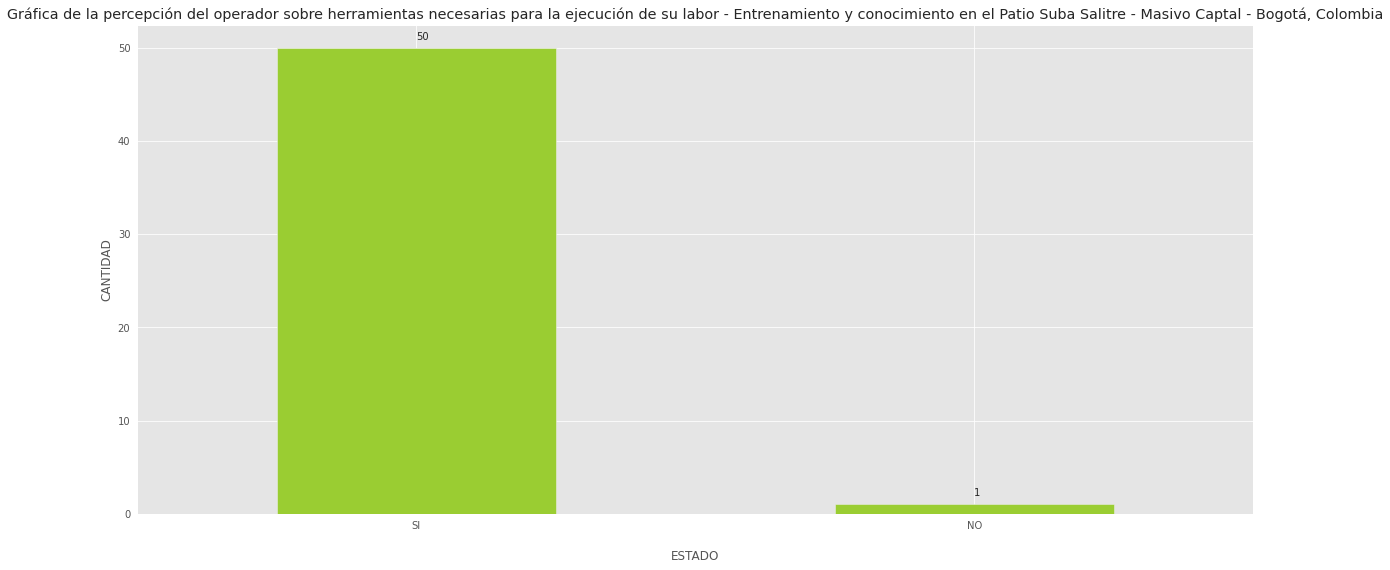

In [ ]:
plt.style.use("ggplot") 
plt.figure(figsize = (20,9))
plt.title("Gráfica de la percepción del operador sobre herramientas necesarias para la ejecución de su labor - Entrenamiento y conocimiento en el Patio Suba Salitre - Masivo Captal - Bogotá, Colombia",)
plt.xlabel("\nESTADO") 
plt.ylabel("CANTIDAD") 
tabla_frecuencia["frec_abs_AAB49"].plot(kind="bar",color = "yellowgreen")

for label, annot in enumerate(tabla_frecuencia['frec_abs_AAB49']):  
  plt.annotate(str(annot),xy=(label,annot + 0.9))

plt.xticks(rotation = 0)
plt.show()

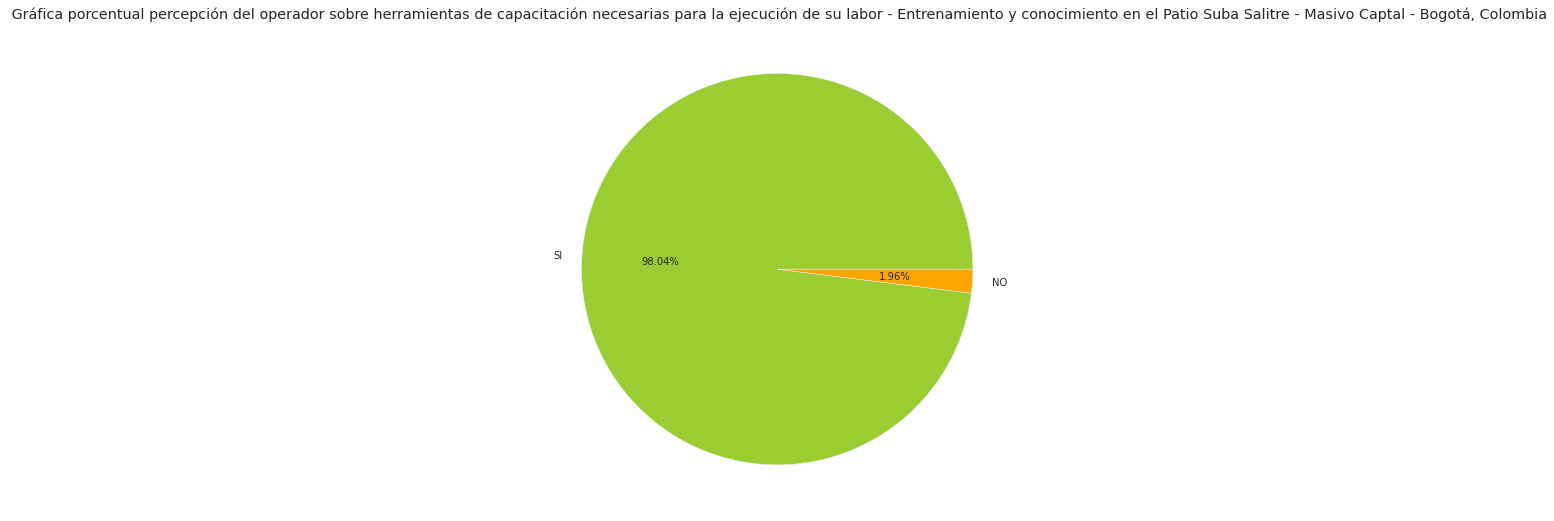

In [ ]:
plt.figure(figsize = (20,9))
plt.pie(tabla_frecuencia['frec_abs_AAB49'],labels = tabla_frecuencia.index,
        colors = ["yellowgreen", "orange"], autopct='%.2f%%')
plt.title(" Gráfica porcentual percepción del operador sobre herramientas de capacitación necesarias para la ejecución de su labor - Entrenamiento y conocimiento en el Patio Suba Salitre - Masivo Captal - Bogotá, Colombia",)
plt.show()

In [ ]:
round(pd.crosstab(df_inf['ACCIDENTE_SIMPLE'], df_inf['AAB49'] , normalize = "index"),2)*100

AAB49,NO,SI
ACCIDENTE_SIMPLE,,
0,0.0,100.0
1,5.0,95.0
2,0.0,100.0


In [ ]:
round(pd.crosstab(df_inf['ACCIDENTE_CON_LESIONADO'], df_inf['AAB49'] , normalize = "index"),2)*100

AAB49,NO,SI
ACCIDENTE_CON_LESIONADO,,
0,2.0,98.0
1,0.0,100.0


In [ ]:
round(pd.crosstab(df_inf['ACCIDENTE_CON_MUERTO'], df_inf['AAB49'] , normalize = "index"),2)*100

AAB49,NO,SI
ACCIDENTE_CON_MUERTO,,
0,2.0,98.0


In [ ]:
crosstab1 = pd.crosstab(index = df_inf["AAB49"],       ## Las categorias que serán los indices.
                        columns = df_inf["AAB50"],     ## Las categorias que serán las columnas.
                        margins = True                 ## Totales por fila y columna.
                        )
crosstab1

AAB50,Falta más capacitacion,All
AAB49,,
NO,1,1
All,1,1


# ***Observaciones***

- 39 Funcionarios estan de acuerdo con respecto a vehículos seguros, esta cantidad representa el 76.47% de los encuestados, frente a los que responden no, esta cantidad es de 12 funcionarios que representan el 23.53%.

- El 94.818.04 esta de acuerdo a capacitaciones y conocimiento, frente a los que no lo estan que representa el 1.96%.

************************************************************************************************************************************************************************************************************************************************

************************************************************************************************************************************************************************************************************************************************

# ***4.2 Accidentados.***



********************************************************************************

En esta sección nos concentraremos en evaluar la población accidentada y conocer cuál fue el factor de siniestralidad. Filtremos los datos y notemos la población accidentada:


***¿EN LO CORRIDO DEL AÑO HA PRESENTADO ACCIDENTE DE TRÁNSITO?***

   Código de pregunta: ***AAB87***

In [ ]:
frec_abs_AAB87= df_inf["AAB87"].value_counts()
frec_abs_AAB87.rename("frec_abs_AAB87", inplace = True)
Frecuencia_relativa_AAB87 = df_inf["AAB87"].value_counts(normalize = True)
Frecuencia_relativa_AAB87.rename("Frecuencia_relativa_AAB87", inplace = True)
Frecuencia_relativa_porcentual_AAB87 = df_inf["AAB87"].value_counts(normalize = True)*100
Frecuencia_relativa_porcentual_AAB87.rename("Frecuencia_relativa_porcentual_AAB87", inplace = True)
tabla_frecuencia = pd.concat([frec_abs_AAB87,Frecuencia_relativa_AAB87,Frecuencia_relativa_porcentual_AAB87],axis=1)
total = pd.DataFrame(tabla_frecuencia.apply(sum,axis=0), columns=["TOTALES"]).T
pd.concat([tabla_frecuencia,total],axis = 0)

,frec_abs_AAB87,Frecuencia_relativa_AAB87,Frecuencia_relativa_porcentual_AAB87
NO,27.0,0.529412,52.941176
SI,24.0,0.470588,47.058824
TOTALES,51.0,1.000000,100.000000


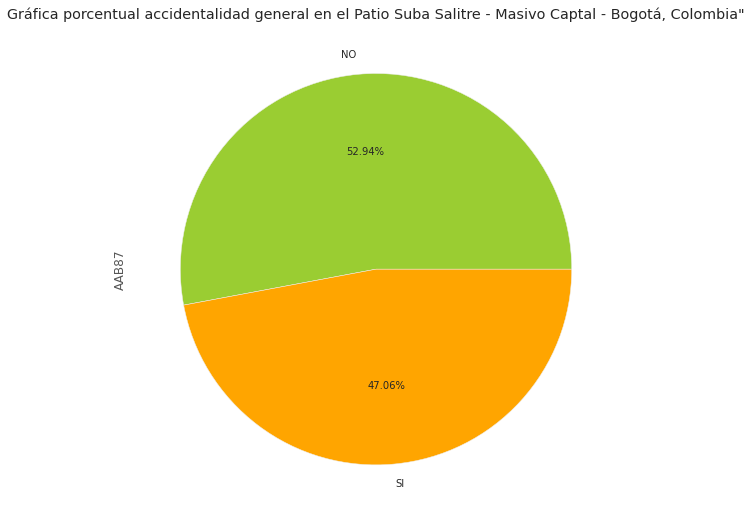

In [ ]:
plot = df_inf['AAB87'].value_counts().plot(kind='pie', autopct='%.2f%%', colors = ["yellowgreen", "orange"],
                                            figsize=(20, 9),
                                            title='Gráfica porcentual accidentalidad general en el Patio Suba Salitre - Masivo Captal - Bogotá, Colombia"')

- El 52.94% de la población total encuestada del patio sufrio un accidente, una cifra bastante alta. veamos como se ditribuye los accidentes en el patio:

***Cifras de accidentes simples:***

In [ ]:
df_inf["ACCIDENTE_SIMPLE"].value_counts()

0    30
1    20
2     1
Name: ACCIDENTE_SIMPLE, dtype: int64

Los accidentes simples se distribuyen de la siguiente manera:

- 30 operadores no presentaron accidente.
- 20 operadores presentaron un accidente simple cada uno.
- Un operador registro dos accidentes simples.

********************************************************************************

***Cifras accidentes con lesionado:***

In [ ]:
df_inf["ACCIDENTE_CON_LESIONADO"].value_counts()

0    45
1     6
Name: ACCIDENTE_CON_LESIONADO, dtype: int64

De los funcionarios que registraron accidentes con lesionado se distribuye de la siguiente manera:

-  45 operadores no registraron accidentes con lesionado.
- 6 operadores registraron un accidente con lesionado, cada uno!.

********************************************************************************

***Cifras accidentes con Muerto:***

In [ ]:
df_inf["ACCIDENTE_CON_MUERTO"].value_counts()

0    51
Name: ACCIDENTE_CON_MUERTO, dtype: int64

 - El patio No registra accidente con muerto.

****************************************************************************************************************************************************************

Con las cifras de los accidentados busquemos esas relaciones lineales que nos ayuden a modelar el sistema.

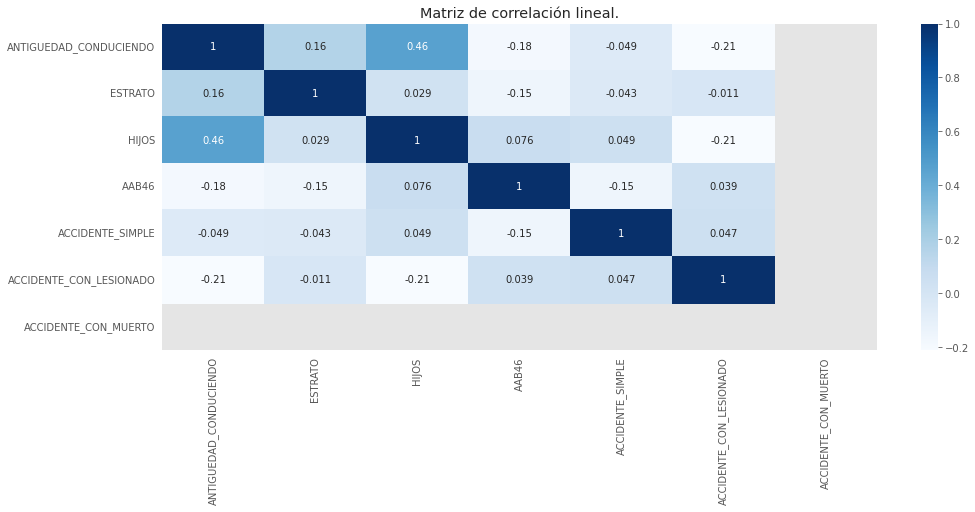

In [ ]:
plt.figure(figsize = (16,6))
corr_mat = df_inf.select_dtypes("number").corr()
sns.heatmap(corr_mat, cmap="Blues", annot=True)
plt.title("Matriz de correlación lineal.")
plt.show()

En busqueda de la verdad, se genera la Matriz de correlación de las variables cuantitativas, lo hacemos con el fin de encontrar una fuerte relación lineal que nos ayude a expresar de que depende el accidente, es claro que para este caso no se ve bien a simple vista un patron, sin embargo se identifica un 0.23 de relacion pequeña entre las variables ANTIGUEDAD_CONDUCIENDO y ACCIDENTE SIMPLE. Es importante destacar que la existencia de correlación entre dos variables, no implica necesariamente causalidad. La asociación observada puede deberse a un tercer factor.


Los coeficientes de correlación lineal son estadísticos que cuantifican la asociación lineal entre dos variables numéricas. Existen diferentes tipos, de entre los que destacan el Pearson, Rho de Spearman y Tau de Kendall. Todos ellos comparten que:

Su valor está comprendido en el rango [+1 , -1]. Siendo +1 una correlación positiva perfecta y -1 una correlación negativa perfecta. Se emplean como medida de la fuerza de asociación entre dos variables (tamaño del efecto):

- 0: asociación nula.

- 0.1: asociación pequeña.

- 0.3: asociación mediana.

- 0.5: asociación moderada.

- 0.7: asociación alta.

- 0.9: asociación muy alta.

Dado la baja relación lineal evidenciada en la matriz anterior, no tenemos evidencia científica para afirmar correlaciones entre variables que puedan describir la accidentalidad.

***Relación lineal débil***

********************************************************************************

- ***¿CONSIDERA QUE CUENTA CON LAS HERRAMIENTAS NECESARIAS PARA LA EJECUCIÓN DE SU LABOR, EN CUANTO A VEHÍCULOS SEGUROS?***

 Código de pregunta: ***AAB47***


In [ ]:
crosstab1 = pd.crosstab(index = df_inf["AAB47"],       ## Las categorias que serán los indices.
                        columns = df_inf["AAB48"],     ## Las categorias que serán las columnas.
                        margins = True                 ## Totales por fila y columna.
                        )
crosstab1

AAB48,Falta de mantenimiento,All
AAB47,,
NO,12,12
All,12,12


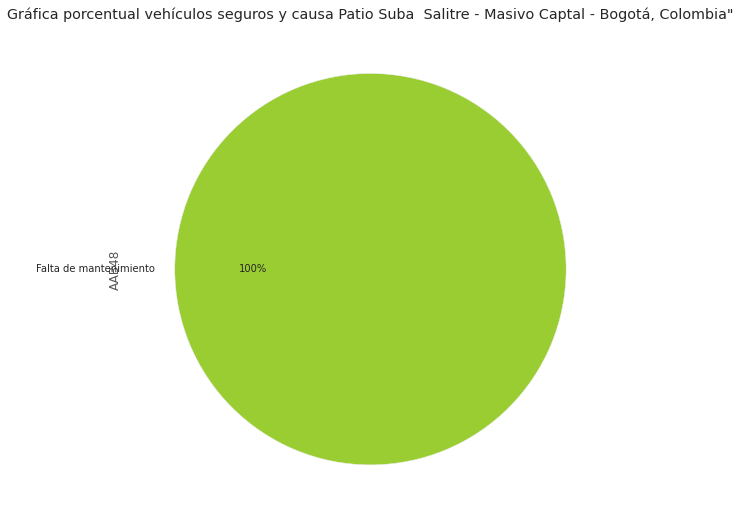

In [ ]:
plot = df_inf['AAB48'].value_counts().plot(kind='pie', autopct='%.f%%', colors = ["yellowgreen", "orange",],
                                            figsize=(20, 9), 
                                            title='Gráfica porcentual vehículos seguros y causa Patio Suba  Salitre - Masivo Captal - Bogotá, Colombia"')

- Los encuestados manifiestan que no cuentan con vehiculos seguros, el 95% dice que es por falta de mantenimientos, y la poca intervención mecánica.

****************************************************************************************************************************************************************

 - ***¿DENTRO DE LA OBSERVACIÓN QUE USTED TIENE EN EL DESARROLLO DE SU LABOR, ORDENE DEL MÁS IMPORTANTE AL MENOS IMPORTANTE LOS ACTORES A LOS QUE LES PRESTA MAYOR ATENCIÓN EN LA VÍA?***

 Dodigo de pregunta: ***AAB51***

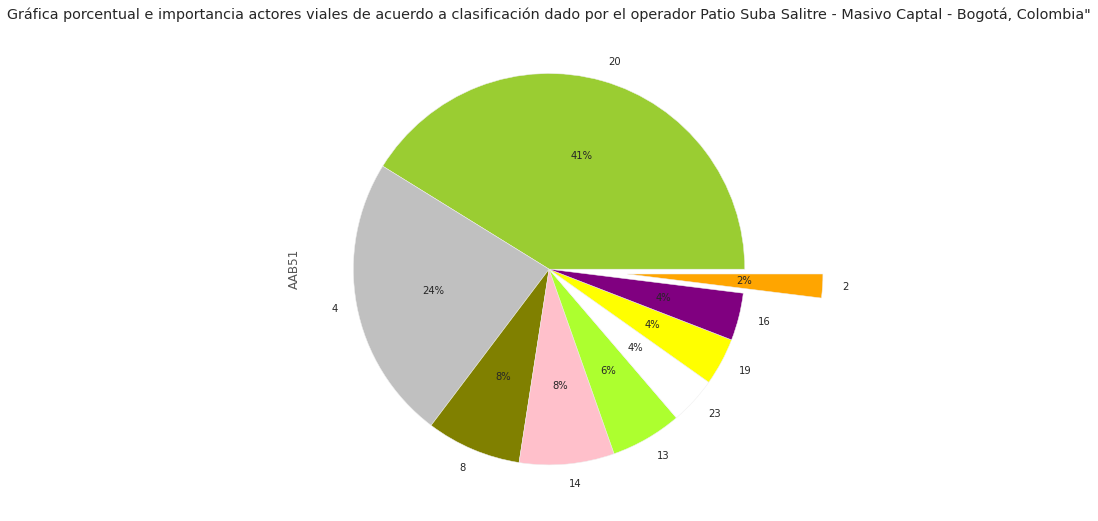

In [ ]:

explode = [0, 0, 0, 0, 0, 0, 0, 0, 0.4]
plot = df_inf['AAB51'].value_counts().plot(kind='pie', autopct='%.f%%', explode = explode,
                                           colors = ["yellowgreen", "silver", "olive","pink","greenyellow","white","yellow","purple","orange"],
                                            figsize=(20, 9),
                                            title='Gráfica porcentual e importancia actores viales de acuerdo a clasificación dado por el operador Patio Suba Salitre - Masivo Captal - Bogotá, Colombia"')

Segun la clasificación de los operadores del patio, ellos prestan mayor atención a los actores en la via:
 
 1. Peatones,Usuarios,Bicitaxistas,Ciclistas,Motociclistas,Buses,Taxis,Carrosparticulares,Camiones ,Furgones - el dato representa el 41%
 2. Usuarios,Ciclistas,Bicitaxistas,Peatones,Motociclistas,Buses,Taxis,Carrosparticulares,Camiones ,Furgones - el dato representa el 24%
 3. Ciclistas,Carrosparticulares,Peatones,Camiones ,Furgones ,Motociclistas,Buses,Taxis,Usuarios,Bicitaxistas - el dato representa el 8%

De los factores a los que menor atención se presta en la vía es a:

 1. Categorías 23,19,16,2. Ver tabla de categorías.


****************************************************************************************************************************************************************

 - ***¿DENTRO DE LA OBSERVACIÓN QUE USTED TIENE EN EL DESARROLLO DE SU LABOR, ¿INDIQUE SOLO UN FACTOR DEL MEDIO AMBIENTE AL QUE DEBE PRESTARLE MAYOR ATENCIÓN?***

 CÓdigo de pregunta: ***AAB52***

***Categorías:***

- Estado de la malla vial (existencia de peralte, puentes, alcantarillas, pendientes y abovedamiento de la vía) = 100

- Las condiciones meteorológicas (presencia de lluvia, niebla, humo, exposición a la luz y luminosidad) = 200

- Todas las anteriores = 300

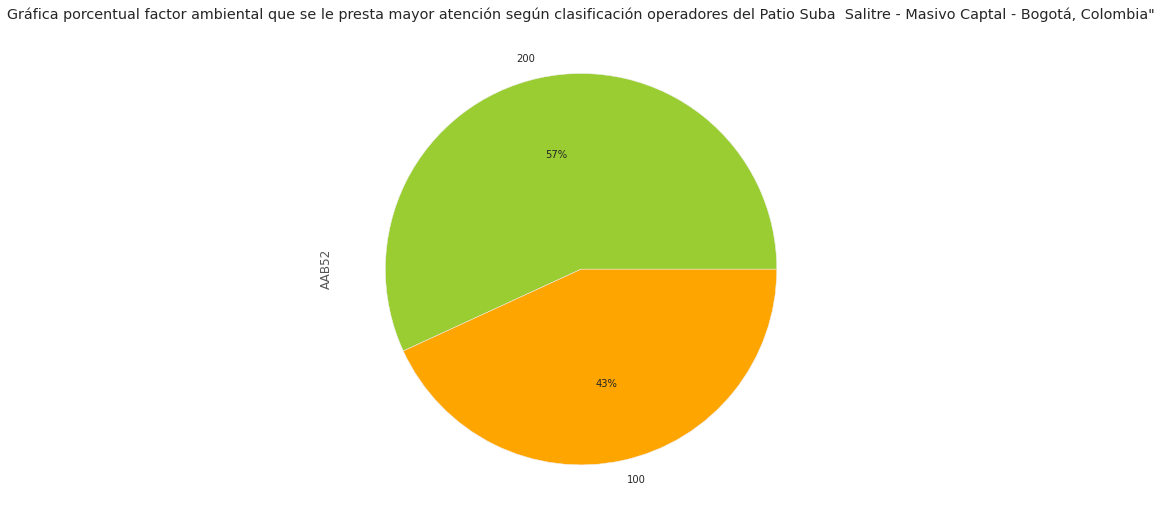

In [ ]:
plot = df_inf['AAB52'].value_counts().plot(kind='pie', autopct='%.f%%', colors = ["yellowgreen", "orange",],
                                            figsize=(20, 9),
                                            title='Gráfica porcentual factor ambiental que se le presta mayor atención según clasificación operadores del Patio Suba  Salitre - Masivo Captal - Bogotá, Colombia"')





- El factor predominante y al cual los operadores dicen prestar mayor atención es a las condiciones meteorológicas, esta clasificación representa el 57%, frente a un 43% que esta asociado al estado de la malla vial.

********************************************************************************

- ***PARA USTED, ¿CUÁL CONSIDERA QUE ES EL FACTOR MÁS RELEVANTE EN LA PRODUCCIÓN DE UN SINIESTRO?***

 Dodigo de pregunta: ***AAB53***

 ***Categorías:***

Factor Humano, hace referencia a la toma de decisión en la ejecución de maniobras sobre el vehículo = 10

Factor Ambiental, hace referencia a las condiciones de la vía y condiciones meteorológicas = 20

Factor Mecánico, hace referencia a las condiciones que tiene el vehículo = 30

In [ ]:
frec_abs_AAB53= df_inf["AAB53"].value_counts()
frec_abs_AAB53.rename("frec_abs_AAB53", inplace = True)
Frecuencia_relativa_AAB53 = df_inf["AAB53"].value_counts(normalize = True)
Frecuencia_relativa_AAB53.rename("Frecuencia_relativa_AAB53", inplace = True)
Frecuencia_relativa_porcentual_AAB53 = df_inf["AAB53"].value_counts(normalize = True)*100
Frecuencia_relativa_porcentual_AAB53.rename("Frecuencia_relativa_porcentual_AAB53", inplace = True)
tabla_frecuencia = pd.concat([frec_abs_AAB53,Frecuencia_relativa_AAB53,Frecuencia_relativa_porcentual_AAB53],axis=1)
total = pd.DataFrame(tabla_frecuencia.apply(sum,axis=0), columns=["TOTALES"]).T
pd.concat([tabla_frecuencia,total],axis = 0)

,frec_abs_AAB53,Frecuencia_relativa_AAB53,Frecuencia_relativa_porcentual_AAB53
10,40.0,0.784314,78.431373
30,6.0,0.117647,11.764706
20,5.0,0.098039,9.803922
TOTALES,51.0,1.000000,100.000000


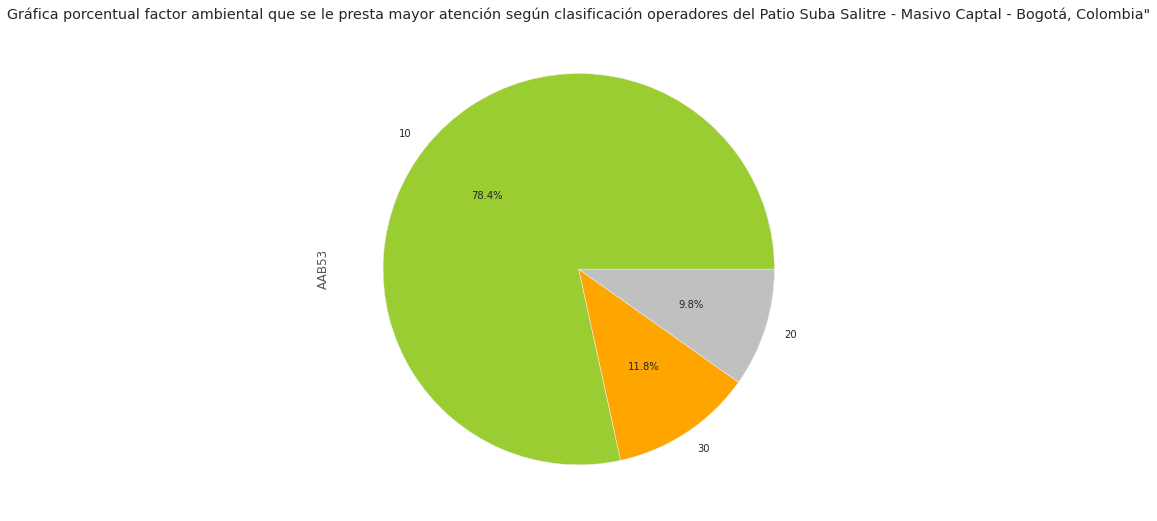

In [ ]:
plot = df_inf['AAB53'].value_counts().plot(kind='pie', autopct='%.1f%%', colors = ["yellowgreen", "orange","silver"],
                                            figsize=(20, 9),
                                            title='Gráfica porcentual factor ambiental que se le presta mayor atención según clasificación operadores del Patio Suba Salitre - Masivo Captal - Bogotá, Colombia"')

De acuerdo a la categorías anteriores y a la clasifición que hace el operador, el factor determinante frente a un accidente es el factor humano con un 78%.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
round(pd.crosstab(df_inf['AAB87'], df_inf['AAB93'] , normalize = "index"),1)*100

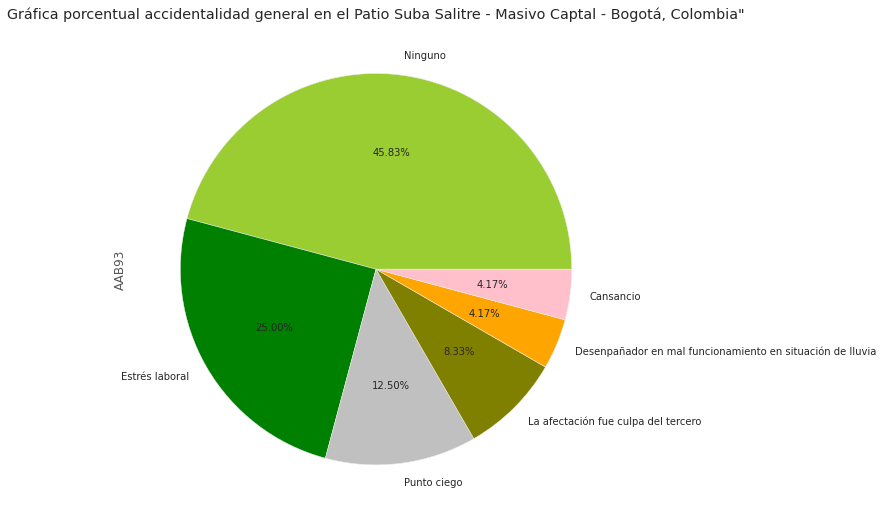

In [ ]:
plot = df_inf['AAB93'].value_counts().plot(kind='pie', autopct='%.2f%%', colors = ["Yellowgreen", "green", "Silver", "Olive", "orange", "pink", "Azure","Lavender","Gold",],
                                            figsize=(20, 9),
                                            title='Gráfica porcentual accidentalidad general en el Patio Suba Salitre - Masivo Captal - Bogotá, Colombia"')

 - Según los resultados y la percepción del operador que  registró accidentes en la encuesta podemos concluir que el factor que impacto en el accidente fue el estrés laboral con un peso del 125%, seguido del punto ciego con el 12.50%.

****************************************************************************************************************************************************************

****************************************************************************************************************************************************************

# ***5. Comportamiento seguro en la conducción.***

- Comportamiento seguro

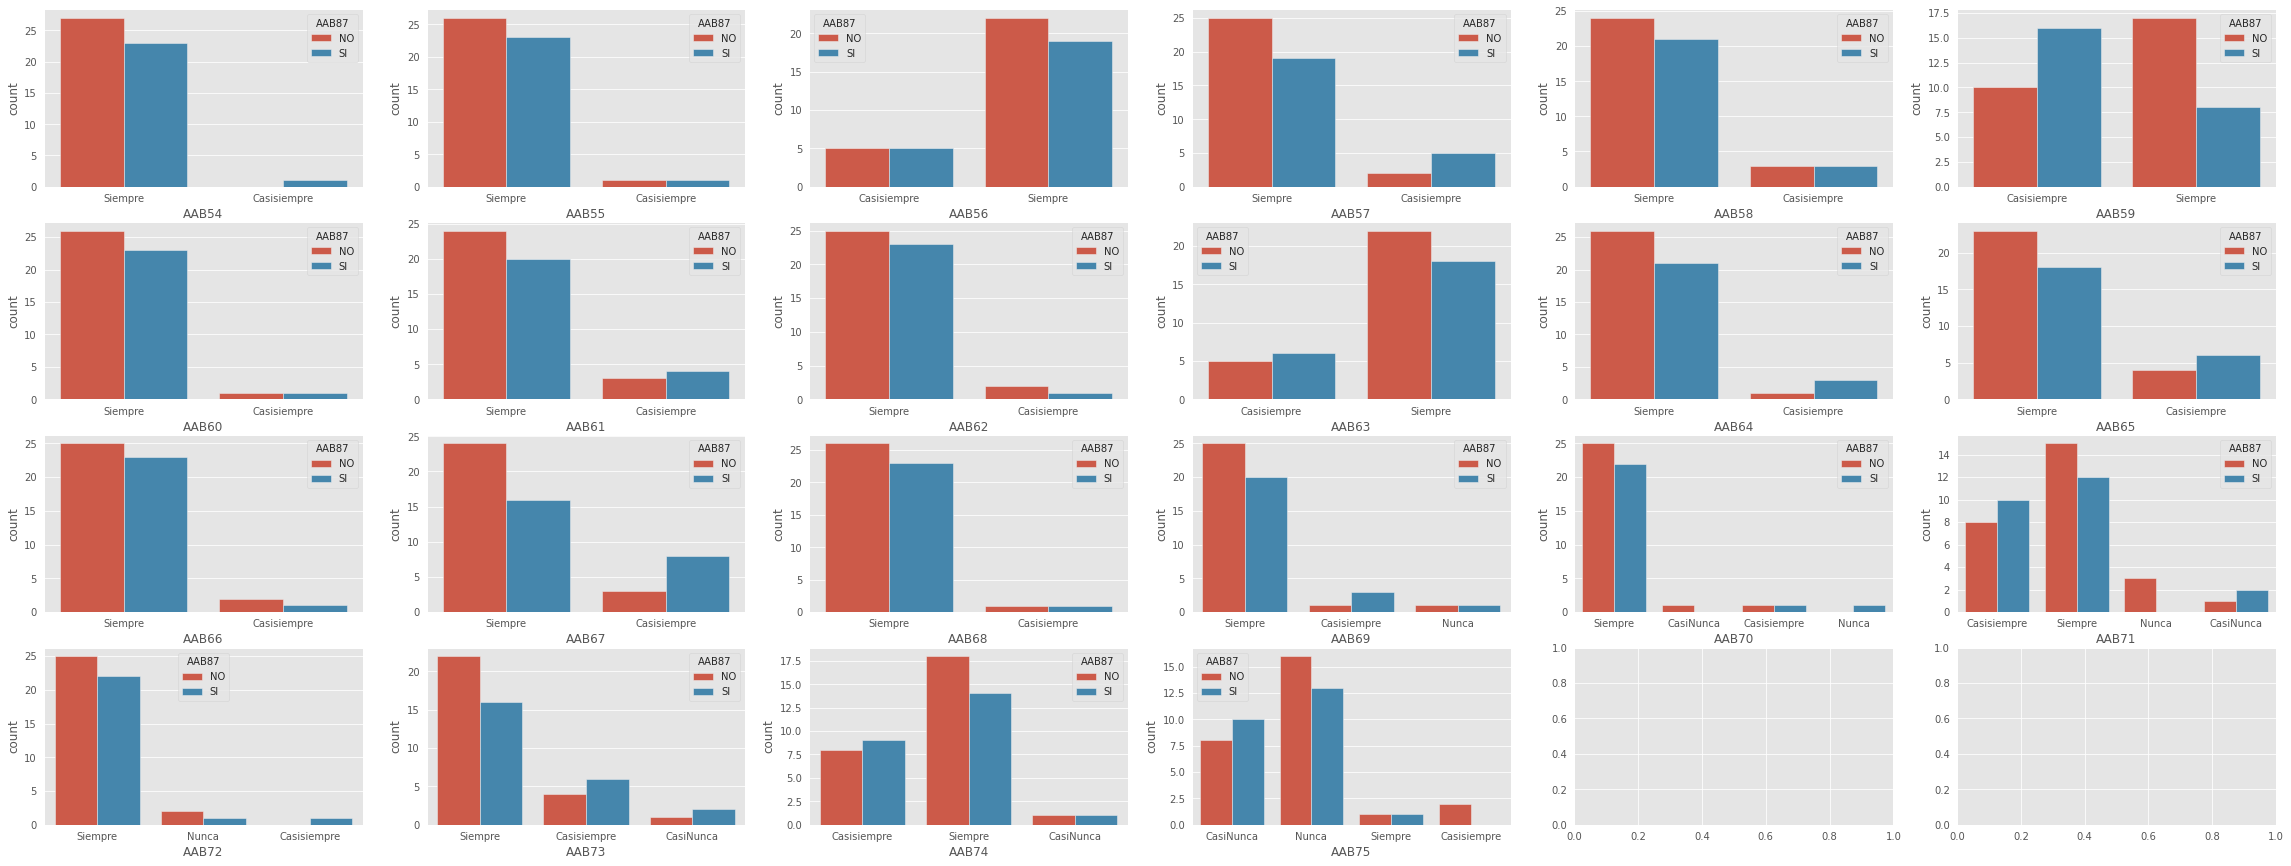

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=6,figsize = (40,15))
##### ------------------------------------- ######
sns.countplot(data = df_inf, x="AAB54", hue="AAB87",
              ax=axes[0,0],),
sns.countplot(data = df_inf, x="AAB55", hue="AAB87",
              ax=axes[0,1],)
sns.countplot(data = df_inf, x="AAB56", hue="AAB87",
              ax=axes[0,2],)
sns.countplot(data = df_inf, x="AAB57", hue="AAB87",
              ax=axes[0,3],)
sns.countplot(data = df_inf, x="AAB58", hue="AAB87",
              ax=axes[0,4],)
sns.countplot(data = df_inf, x="AAB59", hue="AAB87",
              ax=axes[0,5],)
##### ------------------------------------- ######
sns.countplot(data = df_inf, x="AAB60", hue="AAB87",
              ax=axes[1,0],),
sns.countplot(data = df_inf, x="AAB61", hue="AAB87",
              ax=axes[1,1],)
sns.countplot(data = df_inf, x="AAB62", hue="AAB87",
              ax=axes[1,2],)
sns.countplot(data = df_inf, x="AAB63", hue="AAB87",
              ax=axes[1,3],)
sns.countplot(data = df_inf, x="AAB64", hue="AAB87",
              ax=axes[1,4],)
sns.countplot(data = df_inf, x="AAB65", hue="AAB87",
              ax=axes[1,5],)
##### ------------------------------------- ######
sns.countplot(data = df_inf, x="AAB66", hue="AAB87",
              ax=axes[2,0],),
sns.countplot(data = df_inf, x="AAB67", hue="AAB87",
              ax=axes[2,1],)
sns.countplot(data = df_inf, x="AAB68", hue="AAB87",
              ax=axes[2,2],)
sns.countplot(data = df_inf, x="AAB69", hue="AAB87",
              ax=axes[2,3],)
sns.countplot(data = df_inf, x="AAB70", hue="AAB87",
              ax=axes[2,4],)
sns.countplot(data = df_inf, x="AAB71", hue="AAB87",
              ax=axes[2,5],)
##### ------------------------------------- ######
sns.countplot(data = df_inf, x="AAB72", hue="AAB87",
              ax=axes[3,0],),
sns.countplot(data = df_inf, x="AAB73", hue="AAB87",
              ax=axes[3,1],)
sns.countplot(data = df_inf, x="AAB74", hue="AAB87",
              ax=axes[3,2],)
sns.countplot(data = df_inf, x="AAB75", hue="AAB87",
              ax=axes[3,3],)

plt.show()

# ***6.	Actitud en la conducción.***

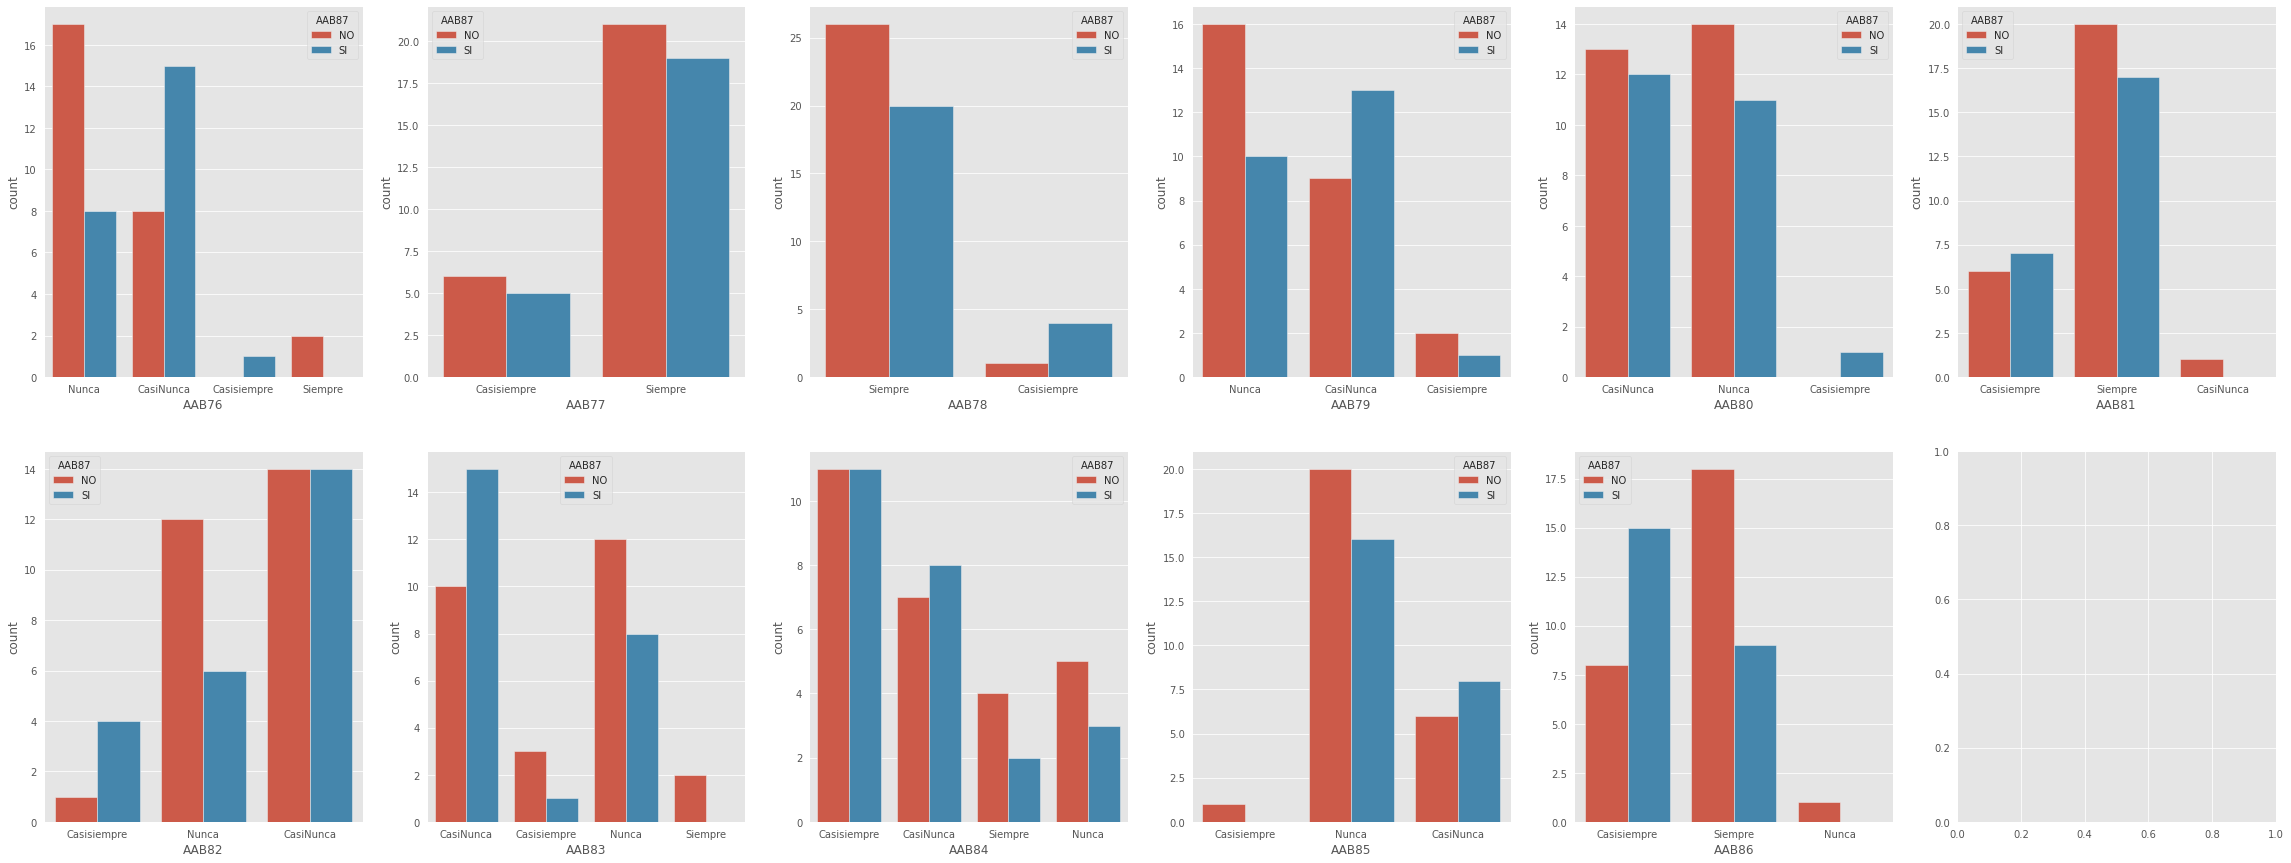

In [ ]:
fiig, axes = plt.subplots(nrows=2, ncols=6,figsize = (40,15))
##### ------------------------------------- ######
sns.countplot(data = df_inf, x="AAB76", hue="AAB87",
              ax=axes[0,0],),
sns.countplot(data = df_inf, x="AAB77", hue="AAB87",
              ax=axes[0,1],)
sns.countplot(data = df_inf, x="AAB78", hue="AAB87",
              ax=axes[0,2],)
sns.countplot(data = df_inf, x="AAB79", hue="AAB87",
              ax=axes[0,3],)
sns.countplot(data = df_inf, x="AAB80", hue="AAB87",
              ax=axes[0,4],)
sns.countplot(data = df_inf, x="AAB81", hue="AAB87",
              ax=axes[0,5],)
##### ------------------------------------- ######
sns.countplot(data = df_inf, x="AAB82", hue="AAB87",
              ax=axes[1,0],),
sns.countplot(data = df_inf, x="AAB83", hue="AAB87",
              ax=axes[1,1],)
sns.countplot(data = df_inf, x="AAB84", hue="AAB87",
              ax=axes[1,2],)
sns.countplot(data = df_inf, x="AAB85", hue="AAB87",
              ax=axes[1,3],)
sns.countplot(data = df_inf, x="AAB86", hue="AAB87",
              ax=axes[1,4],)

plt.show();


# ***7.	Características población accidentada.***


- Gráfica herramientas necesarias para poder evitar accidentes en vía:

 ***¿CONSIDERA QUE LA EMPRESA LE HA BRINDADO LAS HERRAMIENTAS NECESARIAS PARA PODER EVITAR ACCIDENTES EN VÍA?***

 Código de pregunta: ***AAB102***

In [ ]:
frec_abs_AAB102= df_inf["AAB102"].value_counts()
frec_abs_AAB102.rename("frec_abs_AAB102", inplace = True)
Frecuencia_relativa_AAB102 = df_inf["AAB102"].value_counts(normalize = True)
Frecuencia_relativa_AAB102.rename("Frecuencia_relativa_AAB102", inplace = True)
Frecuencia_relativa_porcentual_AAB102 = df_inf["AAB102"].value_counts(normalize = True)*100
Frecuencia_relativa_porcentual_AAB102.rename("Frecuencia_relativa_porcentual_AAB102", inplace = True)
tabla_frecuencia = pd.concat([frec_abs_AAB102,Frecuencia_relativa_AAB102,Frecuencia_relativa_porcentual_AAB102],axis=1)
total = pd.DataFrame(tabla_frecuencia.apply(sum,axis=0), columns=["TOTALES"]).T
pd.concat([tabla_frecuencia,total],axis = 0)

,frec_abs_AAB102,Frecuencia_relativa_AAB102,Frecuencia_relativa_porcentual_AAB102
SI,19.0,0.791667,79.166667
NO,5.0,0.208333,20.833333
TOTALES,24.0,1.000000,100.000000


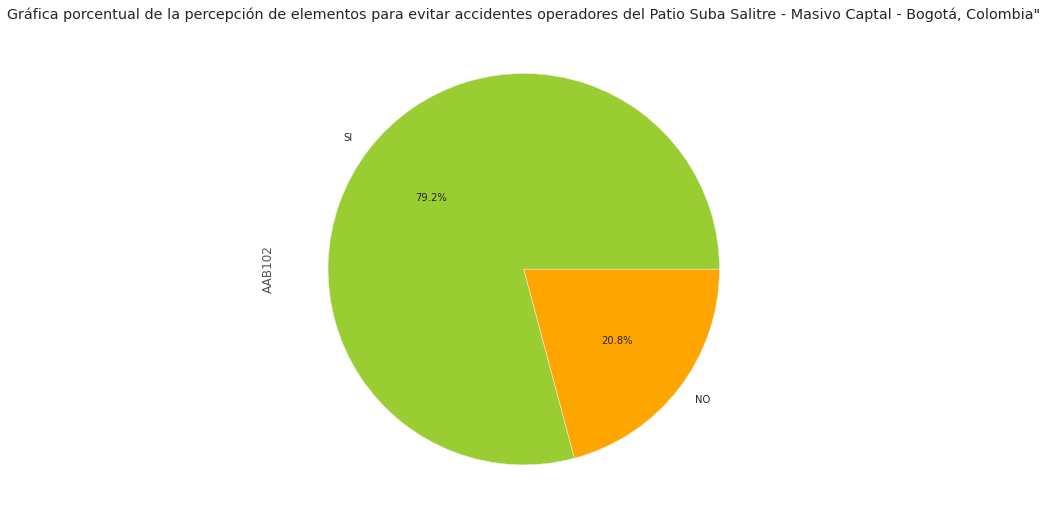

In [ ]:
plot = df_inf['AAB102'].value_counts().plot(kind='pie', autopct='%.1f%%', colors = ["yellowgreen", "orange","silver"],
                                            figsize=(20, 9),
                                            title='Gráfica porcentual de la percepción de elementos para evitar accidentes operadores del Patio Suba Salitre - Masivo Captal - Bogotá, Colombia"')

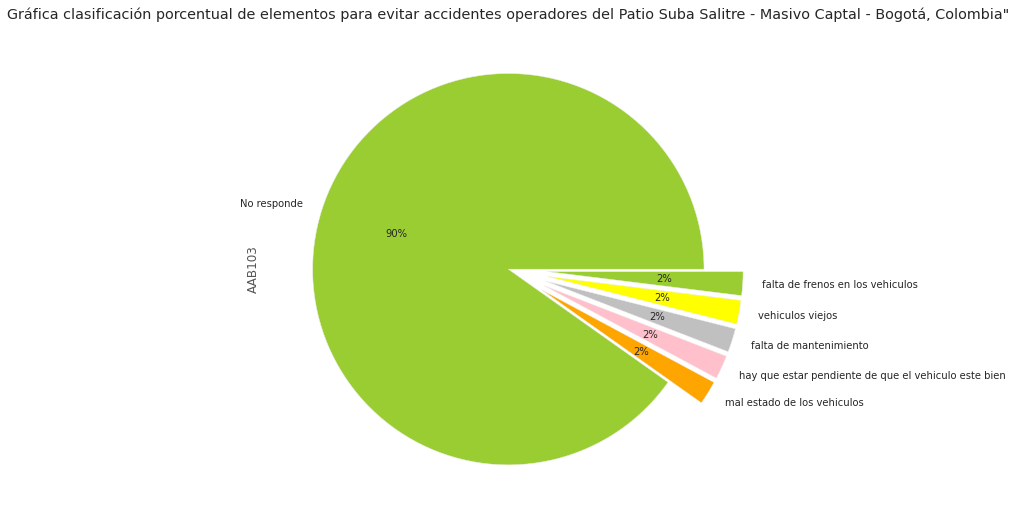

In [ ]:
explode = [0, 0.2 , 0.2, 0.2, 0.2, 0.2]
plot = df_inf['AAB103'].value_counts().plot(kind='pie', autopct='%.f%%', colors = ["yellowgreen", "orange","pink", "silver","yellow",],
                                            figsize=(20, 9),explode = explode,
                                            title='Gráfica clasificación porcentual de elementos para evitar accidentes operadores del Patio Suba Salitre - Masivo Captal - Bogotá, Colombia"')

In [ ]:
Suba crosstab1 = pd.crosstab(index = df_inf["ANTIGUEDAD_CONDUCIENDO"],   
                        columns = df_inf["AAB103"],   
                        margins = True             
                        )
crosstab1

AAB103,No responde,falta de frenos en los vehiculos,falta de mantenimiento,hay que estar pendiente de que el vehiculo este bien,mal estado de los vehiculos,vehiculos viejos,All
ANTIGUEDAD_CONDUCIENDO,,,,,,,
1,5,0,0,0,0,0,5
2,3,0,0,0,0,0,3
4,2,0,0,0,0,0,2
6,4,0,0,0,0,0,4
8,7,0,0,0,0,1,8
11,25,1,1,1,1,0,29
All,46,1,1,1,1,1,51


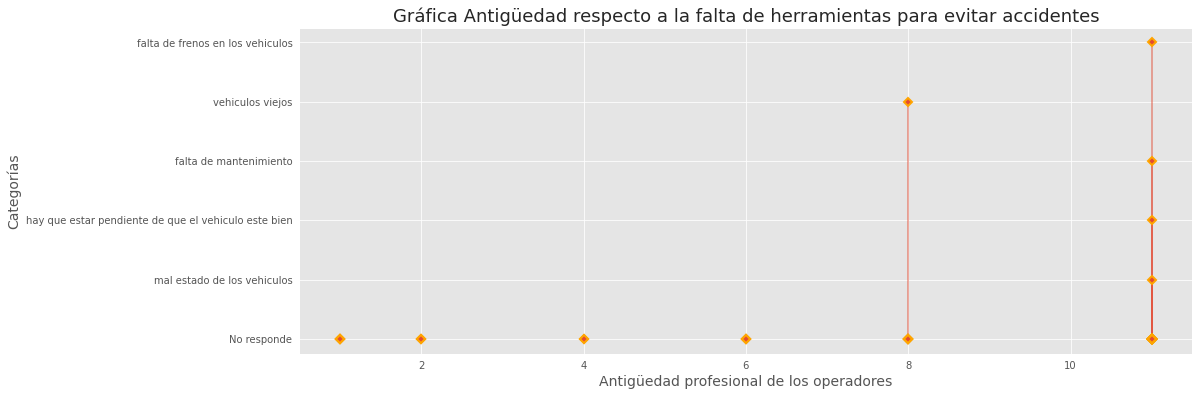

In [ ]:
Splt.figure(figsize = (16,6))
plt.title('Gráfica Antigüedad respecto a la falta de herramientas para evitar accidentes', fontsize=18);
plt.xlabel('Antigüedad profesional de los operadores', fontsize=14);
plt.ylabel('Categorías', fontsize=14);
(markerline, stemlines, baseline) = plt.stem(df_inf['ANTIGUEDAD_CONDUCIENDO'], df_inf['AAB103'])
plt.setp(markerline, marker='D', markersize=5, markeredgecolor="orange", markeredgewidth=2);
plt.setp(stemlines, alpha=0.6 );
plt.setp(baseline, visible=False);
#plt.show()

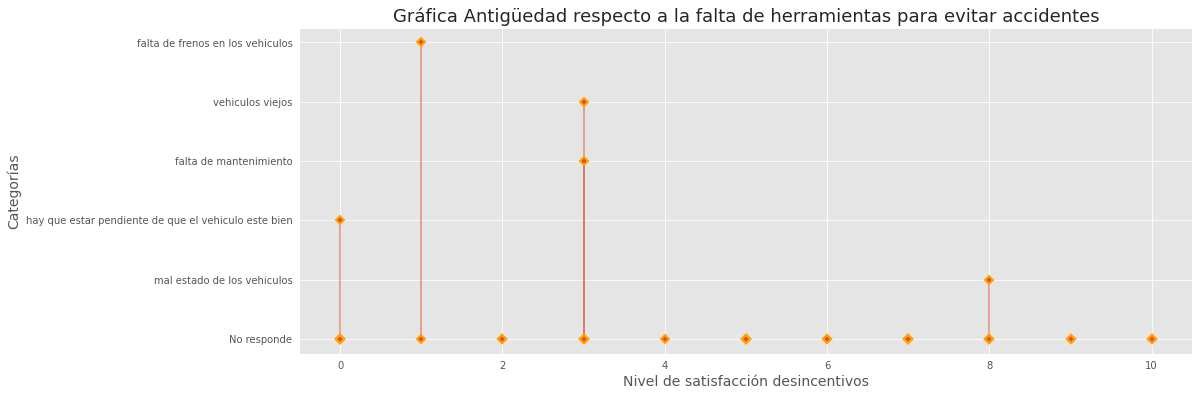

In [ ]:
plt.figure(figsize = (16,6))
plt.title('Gráfica Antigüedad respecto a la falta de herramientas para evitar accidentes', fontsize=18);
plt.xlabel('Nivel de satisfacción desincentivos', fontsize=14);
plt.ylabel('Categorías', fontsize=14);
(markerline, stemlines, baseline) = plt.stem(df_inf['AAB46'], df_inf['AAB103'])
plt.setp(markerline, marker='D', markersize=5, markeredgecolor="orange", markeredgewidth=2);
plt.setp(stemlines, alpha=0.6 );
plt.setp(baseline, visible=False);
#plt.show()

# ***8.	Correlación*** 

- Percepción factor predominante en un accidente - factor que incidió en el accidente.

    ***Categorias:***
  - Factor Humano, hace referencia a la toma de decisión en la ejecución de maniobras sobre el vehículo =10
  - Factor Ambiental, hace referencia a las condiciones de la vía y condiciones meteorológicas=20

  - Factor Mecánico, hace referencia a las condiciones que tiene el vehículo=30

In [ ]:
frec_abs_AAB53= df_inf["AAB53"].value_counts()
frec_abs_AAB53.rename("frec_abs_AAB53", inplace = True)
Frecuencia_relativa_AAB53 = df_inf["AAB53"].value_counts(normalize = True)
Frecuencia_relativa_AAB53.rename("Frecuencia_relativa_AAB53", inplace = True)
Frecuencia_relativa_porcentual_AAB53 = df_inf["AAB53"].value_counts(normalize = True)*100
Frecuencia_relativa_porcentual_AAB53.rename("Frecuencia_relativa_porcentual_AAB53", inplace = True)
tabla_frecuencia = pd.concat([frec_abs_AAB53,Frecuencia_relativa_AAB53,Frecuencia_relativa_porcentual_AAB53],axis=1)
total = pd.DataFrame(tabla_frecuencia.apply(sum,axis=0), columns=["TOTALES"]).T
pd.concat([tabla_frecuencia,total],axis = 0)

,frec_abs_AAB53,Frecuencia_relativa_AAB53,Frecuencia_relativa_porcentual_AAB53
10,40.0,0.784314,78.431373
30,6.0,0.117647,11.764706
20,5.0,0.098039,9.803922
TOTALES,51.0,1.000000,100.000000


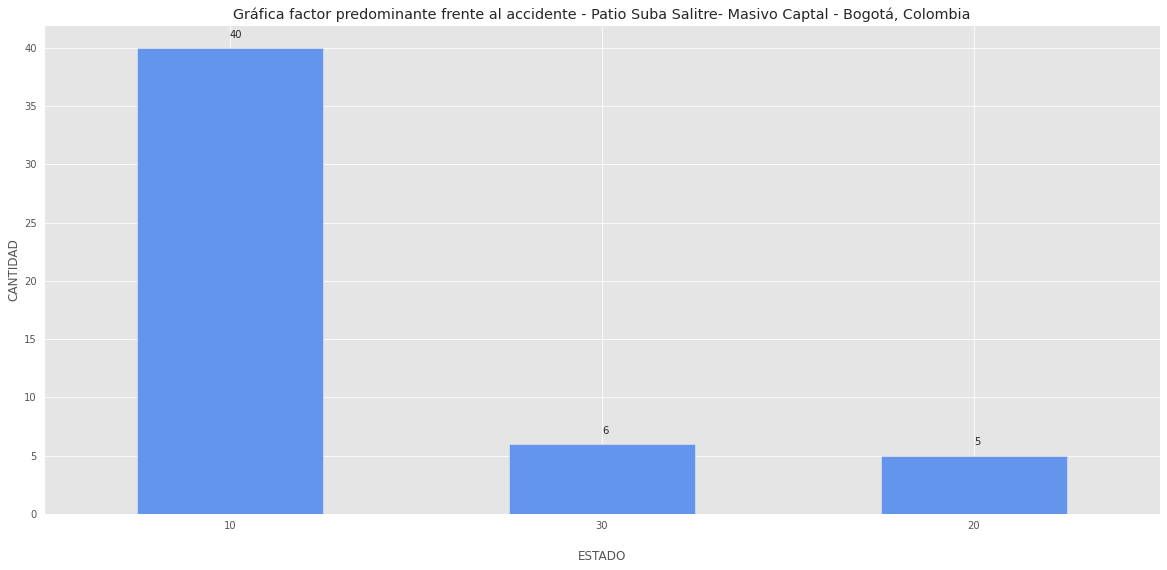

In [ ]:
plt.style.use("ggplot") 
plt.figure(figsize = (20,9))
plt.title("Gráfica factor predominante frente al accidente - Patio Suba Salitre- Masivo Captal - Bogotá, Colombia",)
plt.xlabel("\nESTADO") 
plt.ylabel("CANTIDAD") 
tabla_frecuencia["frec_abs_AAB53"].plot(kind="bar",color = "cornflowerblue")

for label, annot in enumerate(tabla_frecuencia['frec_abs_AAB53']):  
  plt.annotate(str(annot),xy=(label,annot + 0.9))

plt.xticks(rotation = 0)
plt.show()

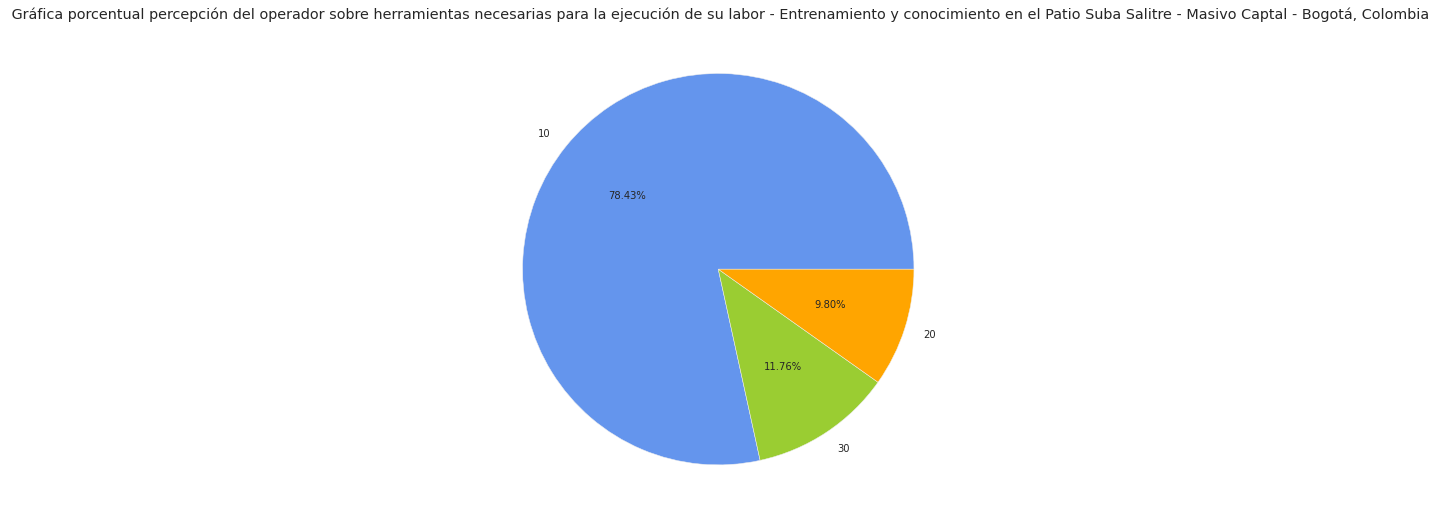

In [ ]:
plt.figure(figsize = (20,9))
plt.pie(tabla_frecuencia['frec_abs_AAB53'],labels = tabla_frecuencia.index,
        colors = ["cornflowerblue","yellowgreen", "orange"], autopct='%.2f%%')
plt.title(" Gráfica porcentual percepción del operador sobre herramientas necesarias para la ejecución de su labor - Entrenamiento y conocimiento en el Patio Suba Salitre - Masivo Captal - Bogotá, Colombia",)
plt.show()

# ***Observaciones:***

De acuerdo a la categorías anteriores y a la clasifición que hace el operador, el factor determinante del accidente es el factor humano con un 78.43%, 40 funcinarios votaron por esta categoría., seguido del factor mecánico con el 11.76%. 

****************************************************************************************************************************************************************

- Reconocimiento de acciones evasivas - tipos de aprendizajes.

- Reconocimiento de acciones evasivas:

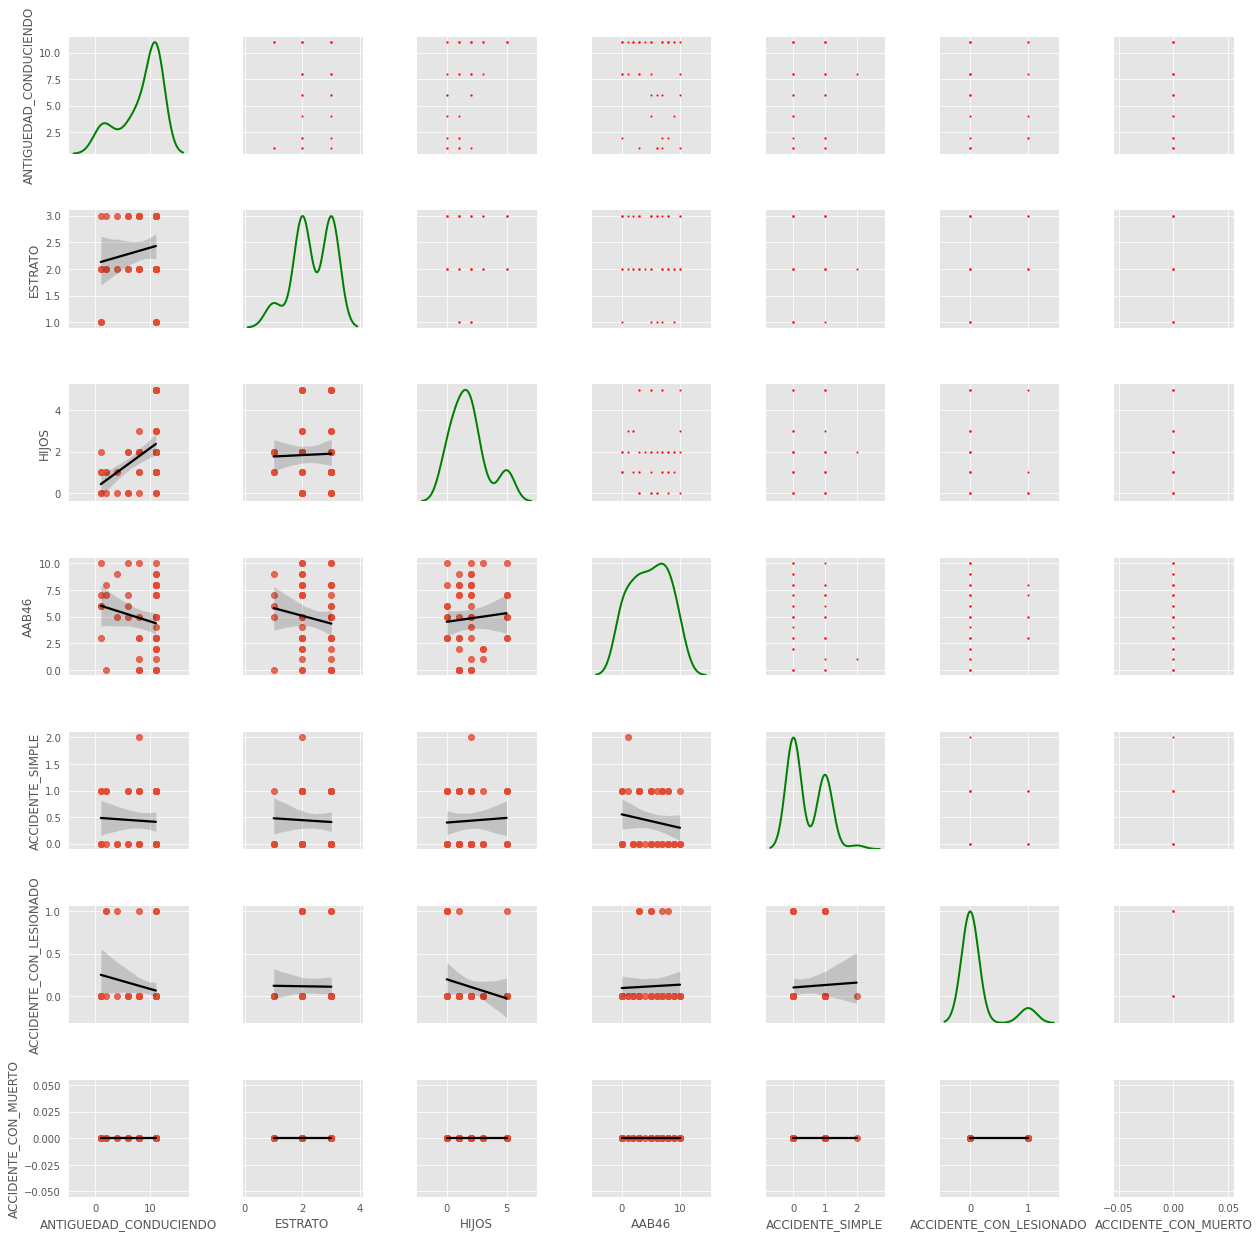

In [ ]:
g = sns.PairGrid(df_inf.select_dtypes(np.number), diag_sharey=False,)
g.map_upper(sns.scatterplot, s=5, color = "red")
g.map_lower(sns.regplot, line_kws = {"color" : "black"})
g.map_diag(sns.kdeplot, lw=2, color = "green")
plt.show()